# Machine Learning Report

### The aim of this report:

This report aims to apply multiple machine learning algorithms to analyze the default payment of credit cards. By using the financial institutions client data provided by UCI Machine
Learning Repository, we will evaluate and compare the performance of the model candidates in order to choose the most robust model. Moreover, we will also decide which are important features in our best predictive model.

### Summary 

#####  1- Introduction to the problem
#####  2- Business and Data Understanding
#####  3- Data Exploratory Analysis
#####  4- Model Analysis

## Introduction to the problem

The delinquency rate indicates the percentage of past-due loans within the borrowers’ entire loan portfolio. 
The climbing delinquencies
will result in significant amount of money loss from the lending institutions, such as those commercial banks. 
Therefore, it is very crucial for banks to have a risk prediction model and
be able to classify the most relative characteristics that are indicative of people who have higher probability to default on credit card loans. 
A robust model is not only a useful tool for the lending institutions to make decision on credit card applications, but it can also help the clients to aware of the behaviors that may damage their credit scores.

## Business and Data Understanding

#### CRISP DM (CRoss Industry Standard Process for Data Mining)
##### Business understanding – What does the business need?
According to the research paper proposed by Cheng Yeh a,*, Che-hui Lien b that represents "The comparisons of data mining techniques for the predictive
accuracy of probability of default of credit card clients", the major problem is to predict whether a potential debt will be payed in time or will default.
Based on given data, the features might play a major role in predict whether a client will default or not.
The result is either 0 or 1 ( default and non default)


##### Data understanding – What data do we have? Is it clean?

The data set for training and testing is obtained from UCI Machine Learning Repository webpage. 
It was donated to UCI Repository in 2016 by Taiwans institutions, Chung Hua
University and Tamkang University. 
This data set contains the information of customers default payment in Taiwan. 
There are 30,000 different instances and 25 attributes total; each
instance represents one customer, and attributes consist demographic information about the customers and their past payment history from April to September.

###### Attribute Information
ID: unique identification number assigned to each customer

LIMIT BAL: amount of given credit access line

SEX: gender (1 = male; 2 = female)

EDUCATION: highest degree obtained (1 = graduate school; 2 = university; 3 = high school; 4 = others; 5 = unknown; 6 = unknown)

MARRIAGE: marital status (1 = married; 2 = single; 3 = others)

AGE: age in year

PAY 0: monthly payment record in September

PAY 2: monthly payment record in August

PAY 3: monthly payment record in July

PAY 4: monthly payment record in June

PAY 5: monthly payment record in May

PAY 6: monthly payment record in April

BILL AMT1: total amount owed in September

BILL AMT2: total amount owed in August

BILL AMT3: total amount owed in July

BILL AMT4: total amount owed in June

BILL AMT5: total amount owed in May

BILL AMT6: total amount owed in April

PAY AMT1: amount of previous payment in September

PAY AMT2: amount of previous payment in August

PAY AMT3: amount of previous payment in July

PAY AMT4: amount of previous payment in June

PAY AMT5: amount of previous payment in May

PAY AMT6: amount of previous payment in April

default payment next month: whether a customer is defaulted on next months payment or not (1 = defaulter; 0 = non-defaulter)

The columns from PAY 0 to PAY 6 represent the repayment status in each month from April to September: -1 indicates paying duly for one month; -2 indicates paying duly for two months; . . . ; -x indicates paying duly for x months. 

The positive number shows that how many months the payment has been delayed. For example, 1 means that the payment has been delayed for 1 month; 2 mean that the payment has been delayed for 2 months; . . . ; x means that the payment has been delayed for x months.


## Data Exploratory Analysis

##### Librarbies importation 

In [1]:
#import graphviz
#import plotly
#import imblearn

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
#import plotly.figure_factory as ff
from sklearn.utils import resample 
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.model_selection import KFold,GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_auc_score
from sklearn import svm
#import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
import time



##### Data Reading 
in this section, we will rename the column " default payment next month " to "def_pay " and " pay_0" to "pay_1"


In [2]:
df=pd.read_excel("default of credit card clients.xls", header=1)
df = df.rename(columns={'default payment next month': 'def_pay', 'PAY_0':'PAY_1'})                                                                                            


In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


##### Verifying the shape of our dataframe as well as the name of columns

In [4]:
print(df.columns)
print(df.shape)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')
(30000, 25)


##### Verifying the type of data in our dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

We can notice that our dataframe contains Data of type integer and contains no null values.
##### let's check for duplicate Values

In [6]:
duplicateDFRow = df[df.duplicated()]

print(duplicateDFRow)

Empty DataFrame
Columns: [ID, LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_1, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6, def_pay]
Index: []

[0 rows x 25 columns]


#### Let's check for NaN values and print the statistics of our data

In [7]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
def_pay      0
dtype: int64

In [8]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


##### Description Analysis
Reading the description, we can notice the existence of unknown values in the columns : SEX, Education, and Marriage, which makes our data suspicious.

Let's analyse the description: 

In sex education and marriage, we can notice that the median is superior to the mean, which means that our data is skewed to the left.

We can also notice that in most features, the median is different than the mean, which indicates the presence of outliers that affect the median.

The Standard Deviation is significatily lower from the mean in most features, which indicates a great spread in data from the mean value.

Moreover, we can see that the average amount of given credit access line is 167,484 with an extremely high standard derivation close to 130,000, which can be explained by the large number of maximum credit card limit of 1 million. 
The average education level is 1.853, which indicates that most customers obtained bachelor or master degrees.
More customers are either married or singled, compared to the number of unknown. 
The median age is 35.5 with 9.2 standard deviation. The youngest customer is 21 years old, while the oldest is 79 years old

##### Data Visualisation

#### Correlation Matrix

In [9]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

<ipython-input-10-5db1cb273443>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(data, dtype=np.bool)


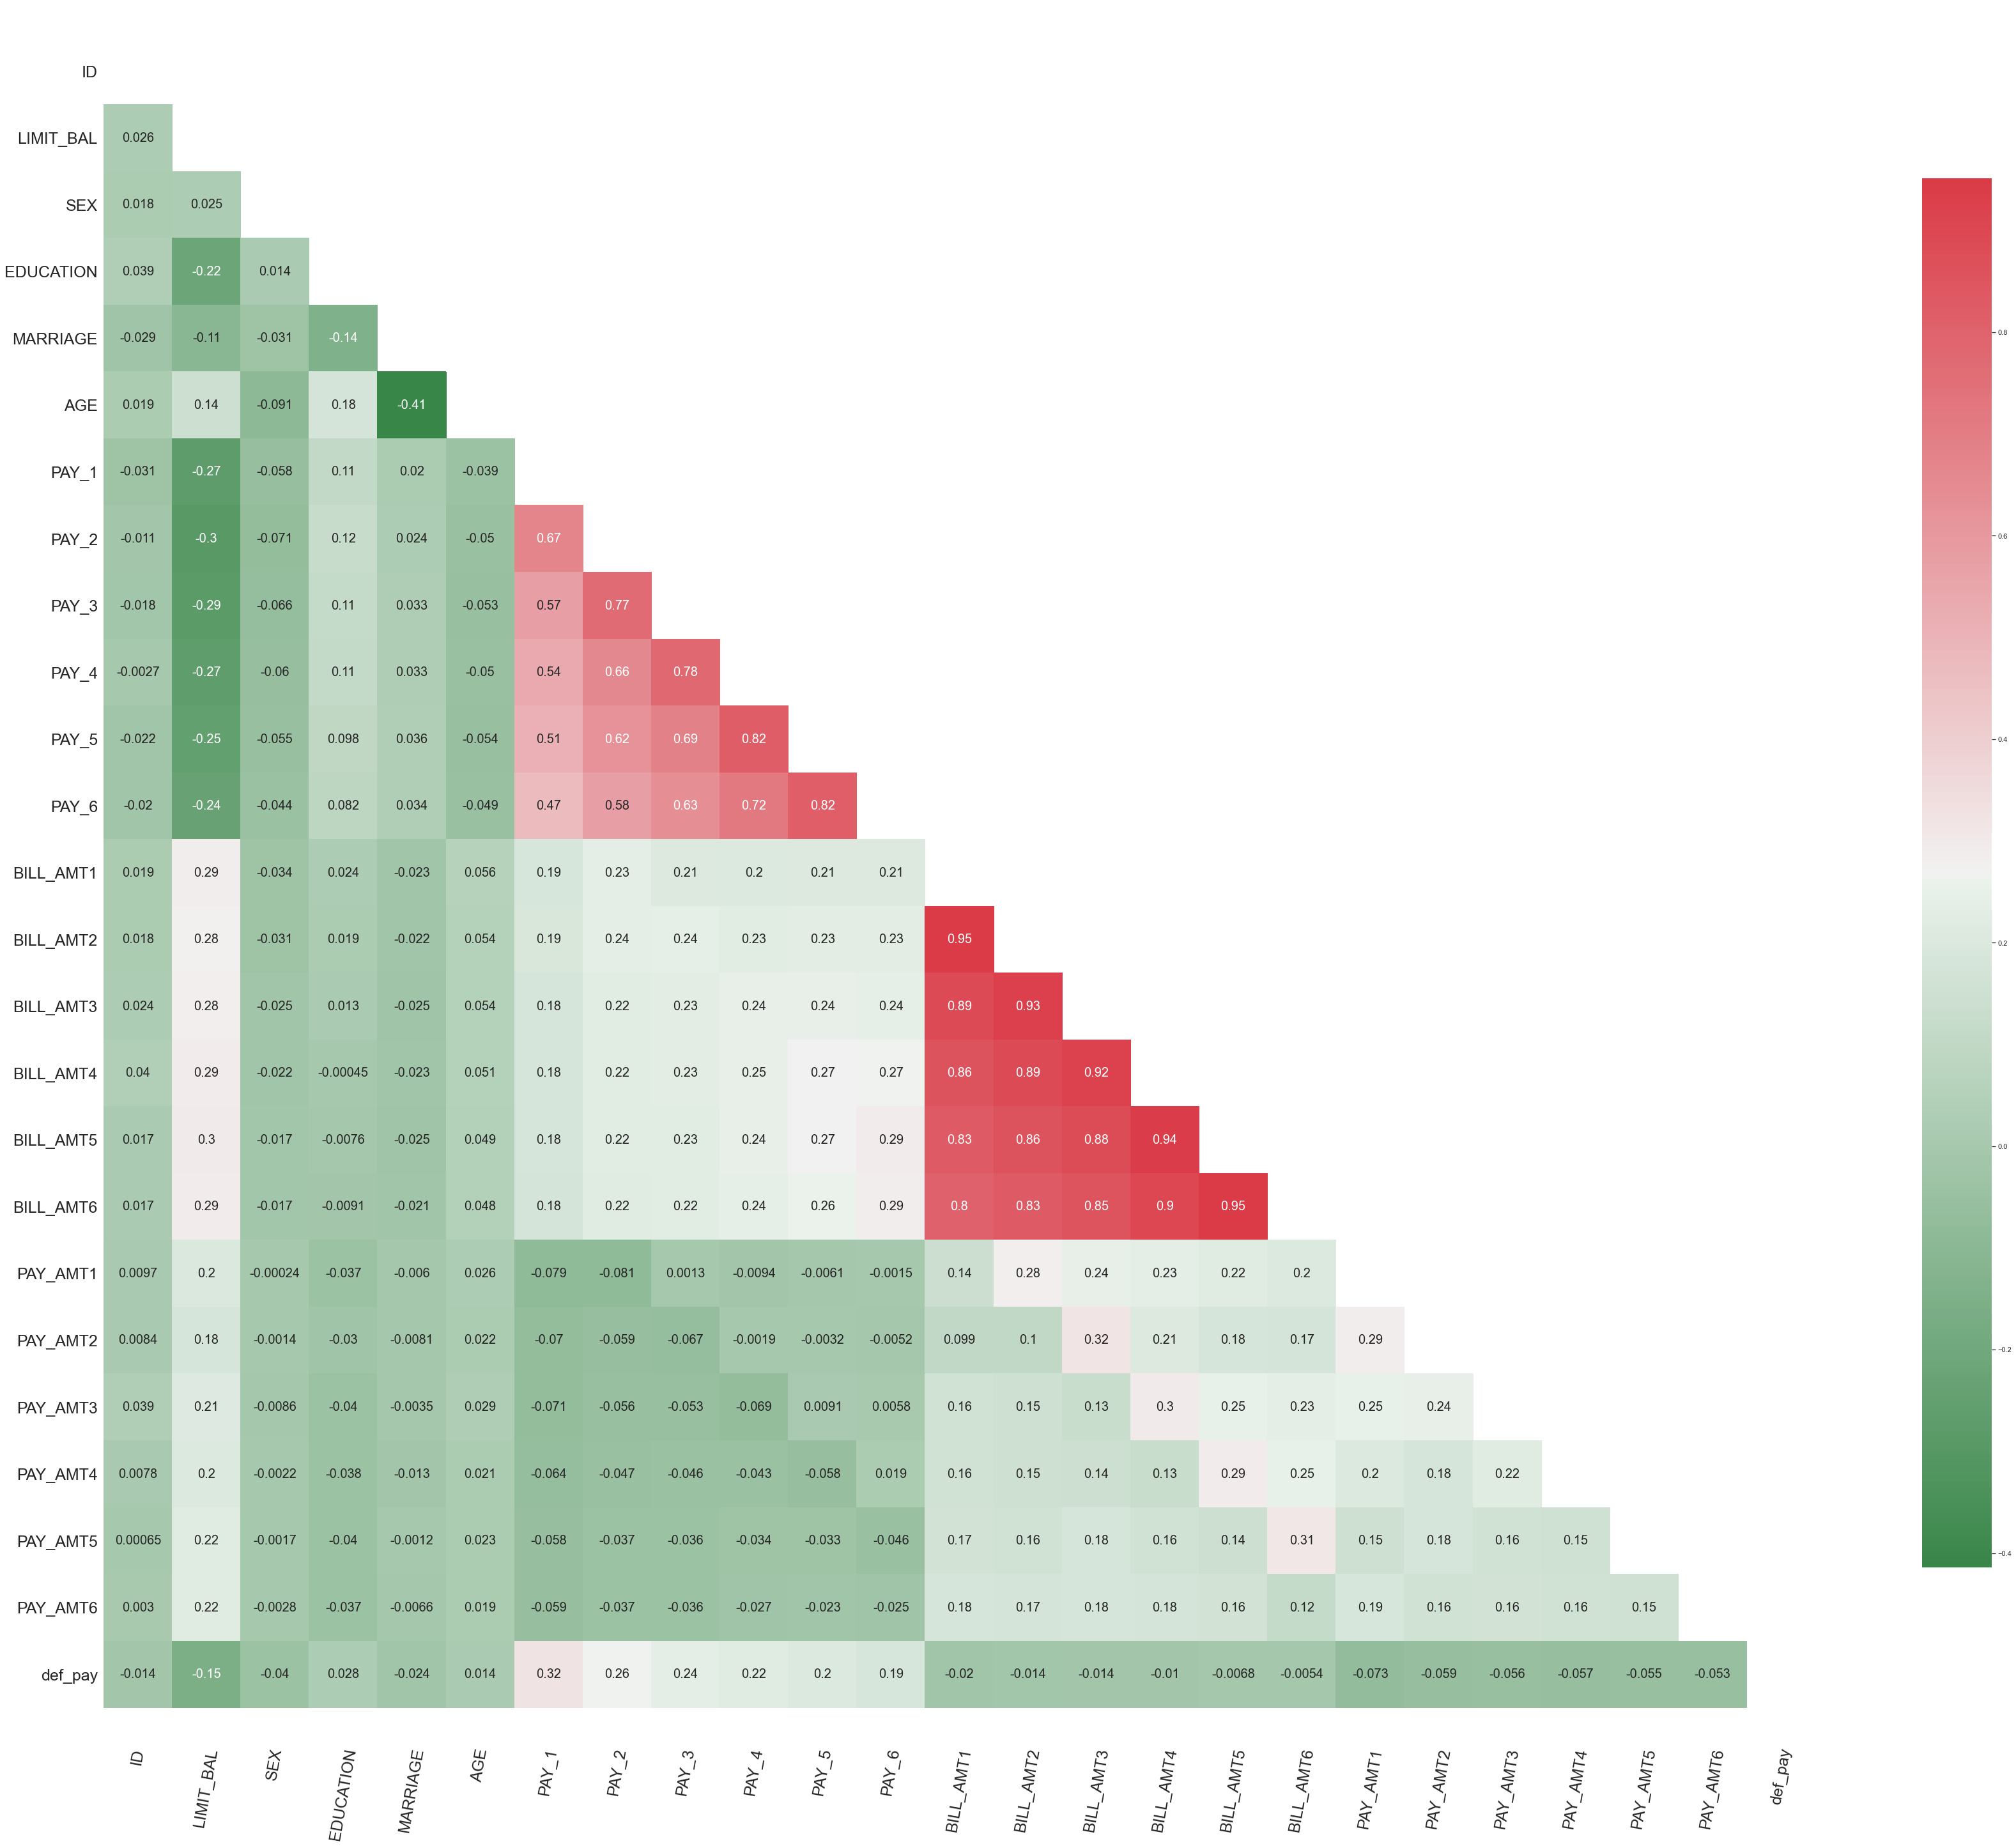

In [10]:
# Now that we have our features, let's plot them on a correlation matrix to remove anything that might 
# cause multi-colinearity within our model

sns.set(style="white")
# Creating the data
data = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(60,50))

# Create a custom color palette
cmap = \
sns.diverging_palette(133, 10,
                      as_cmap=True)  
# as_cmap returns a matplotlib colormap object rather than a list of colors
# Green = Good (low correlation), Red = Bad (high correlation) between the independent variables

# Plot the heatmap
g = sns.heatmap(data=data, annot=True, cmap=cmap, ax=ax, 
                mask=mask, # Splits heatmap into a triangle
                annot_kws={"size":20},  #Annotation size
               cbar_kws={"shrink": 0.8} # Color bar size
               );


# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Changes size of the values on the label
ax.tick_params(labelsize=25) 

ax.set_yticklabels(g.get_yticklabels(), rotation=0);
ax.set_xticklabels(g.get_xticklabels(), rotation=80);

In [11]:
df_default_corrs = data.iloc[:-1,-1:]   # data = df.corr()  
df_default_corrs

,def_pay
ID,-0.013952
LIMIT_BAL,-0.153520
SEX,-0.039961
EDUCATION,0.028006
MARRIAGE,-0.024339
AGE,0.013890
PAY_1,0.324794
PAY_2,0.263551
PAY_3,0.235253
PAY_4,0.216614


<AxesSubplot:>

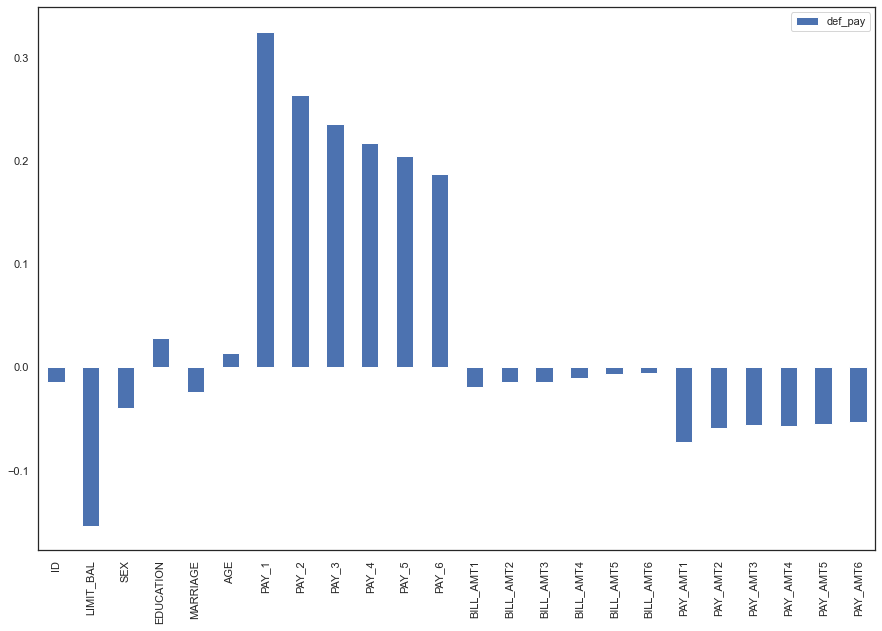

In [12]:
df_default_corrs.plot(kind='bar',figsize=(15,10))

From the graph above we can visually see that PAY_1 has the highest correlation to DEFAULT or not!

##### Credit Card Customer - target value

In [13]:
df.def_pay.value_counts()

0    23364
1     6636
Name: def_pay, dtype: int64

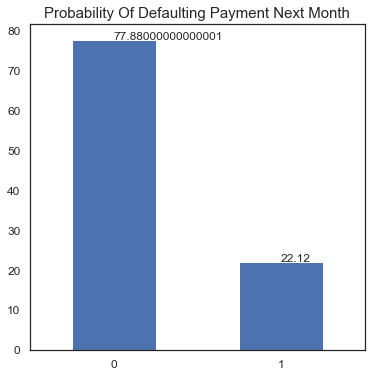

In [14]:

#noticing that the frequency of  def_pay = 1 is 22.12% doesn't necessarily mean that there is no dirt in our data
def_cnt = (df.def_pay.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

6,636 customers (approximate 22.12% of the entire data set) will default in the next months payment, while 23,364 will not default. 
This result is quite reasonable because the difference is insignificant so that this data set should not have much bias information and can be used in our further analysis.
The amount of credit line may be a good indicator of defaulting behavior.

Intuitively, people who have good credit score are likely given high credit line compared to those who have very low credit score.

On the other hand, people who have default payment in the past are usually hard to raise their credit lines. Therefore, the number of defaulters with credit lines in the top 25% should be much smaller than the number of defaulters having low credit line.

#### Age impact on Default

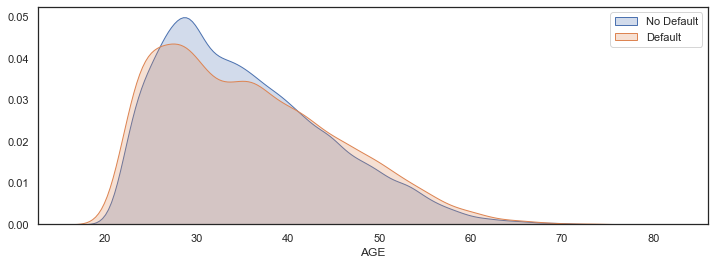

In [15]:
plt.figure(figsize=(12,4))

sns.kdeplot(df.loc[(df['def_pay'] == 0), 'AGE'], label = 'No Default', shade = True)
sns.kdeplot(df.loc[(df['def_pay'] == 1), 'AGE'], label = 'Default', shade = True)
plt.ylabel('')
plt.legend()
plt.show()

the distribution is now more specific, people with age range [ 25 -30 ] have a high chance of  paying
let's check the percentage of def pay

In [16]:
df['AgeBin'] = pd.cut(df['AGE'],[20, 25, 30, 35, 40, 50, 60, 80])
print(df['AgeBin'].value_counts())

(25, 30]    7142
(40, 50]    6005
(30, 35]    5796
(35, 40]    4917
(20, 25]    3871
(50, 60]    1997
(60, 80]     272
Name: AgeBin, dtype: int64


In [17]:
df['def_pay'].groupby(df['AgeBin']).value_counts(normalize = True)

AgeBin    def_pay
(20, 25]  0          0.733402
          1          0.266598
(25, 30]  0          0.798516
          1          0.201484
(30, 35]  0          0.805728
          1          0.194272
(35, 40]  0          0.783811
          1          0.216189
(40, 50]  0          0.767027
          1          0.232973
(50, 60]  0          0.747621
          1          0.252379
(60, 80]  0          0.731618
          1          0.268382
Name: def_pay, dtype: float64

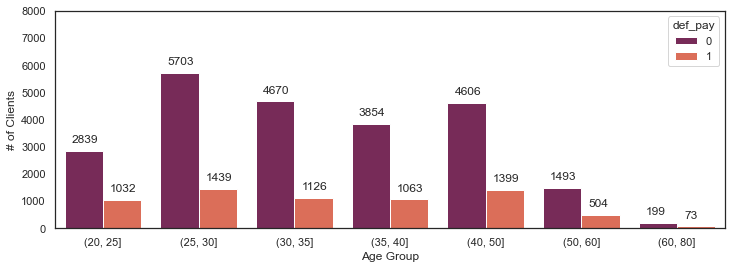

In [18]:
plt.figure(figsize=(12,4))

df['AgeBin'] = df['AgeBin'].astype('str')
AgeBin_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']

ax = sns.countplot(data = df, x = 'AgeBin', hue="def_pay", palette = 'rocket', order = AgeBin_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,8000)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

##### Sex Impact on Defaulting

In [19]:
df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

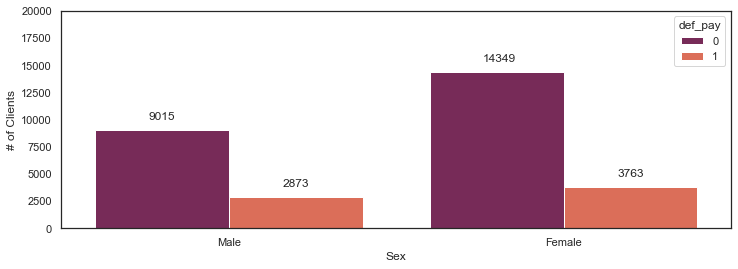

In [20]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'SEX', hue="def_pay", palette = 'rocket')

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

The bar chart suggests that the number of female customers are more than the male customers, and the number of female defaulters are slighter higher than males. Although it is
hard to find a tenable reason that sex could have any impact on the default payment, this
column will still be included in the data set for training the models.


#### Education impact on defaulting

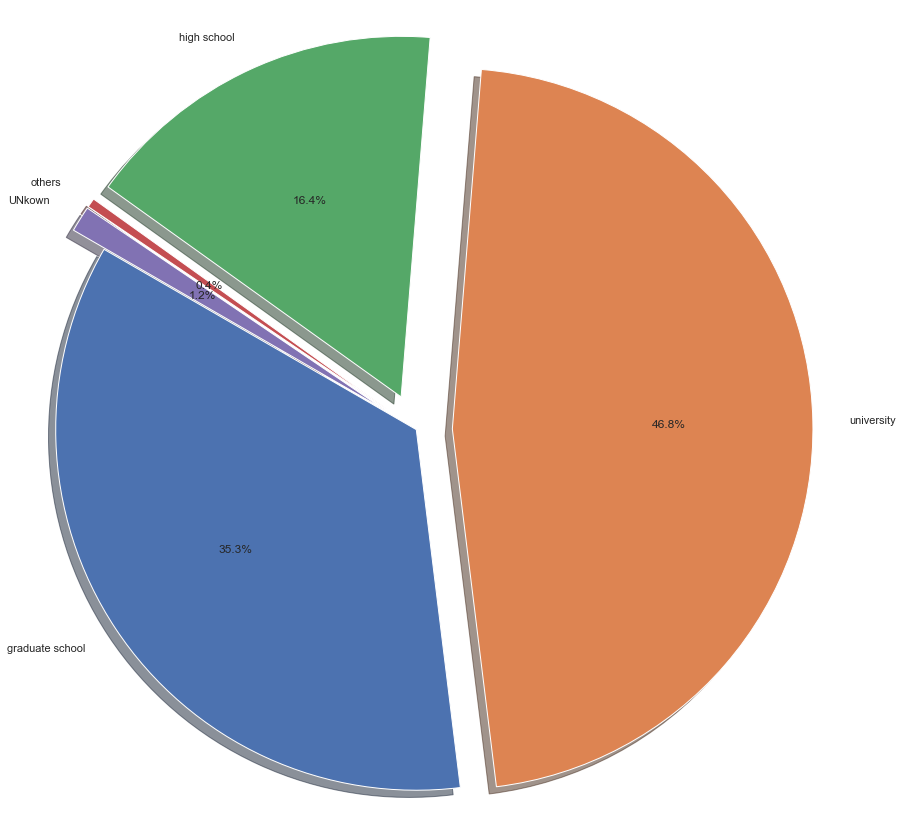

In [21]:
counts_left=[10585,14030,4917,123,345]
department_left=['graduate school','university','high school','others','UNkown']
explode=[0,0.1,0.1,0.1,0.1]
fig1, ax1 = plt.subplots(figsize=(15,15))
ax1.pie(counts_left, explode=explode,labels=department_left, autopct='%1.1f%%',
        shadow=True, startangle=150)
ax1.axis('equal')  
plt.show()

In [22]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [23]:
df['def_pay'].groupby(df['EDUCATION']).value_counts(normalize = True)


EDUCATION  def_pay
0          0          1.000000
1          0          0.807652
           1          0.192348
2          0          0.762651
           1          0.237349
3          0          0.748424
           1          0.251576
4          0          0.943089
           1          0.056911
5          0          0.935714
           1          0.064286
6          0          0.843137
           1          0.156863
Name: def_pay, dtype: float64

In [24]:
df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(0,5)
df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(6,5)

In [25]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      345
4      123
Name: EDUCATION, dtype: int64

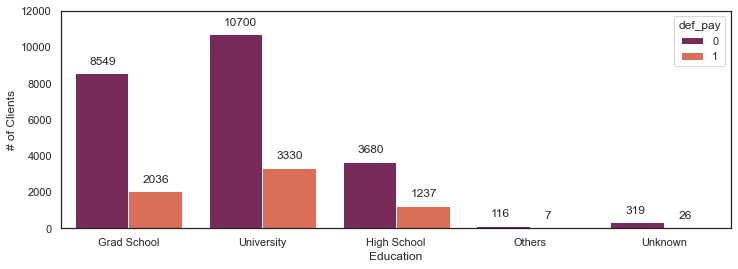

In [26]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'EDUCATION', hue="def_pay", palette = 'rocket')

plt.xlabel("Education", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,12000)
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+500))

plt.show()

On the other hand, no evidence of significant education level’s impact was found in the
polar area chart of the education level against defaults payment, though we normally believe
that people who obtained high degrees tend to pay their loans duly because they may earn
much more than those who never earned a degree. Once making money is not concerned
anymore, the loans should not be worried as well.

#### Maritual Status

In [27]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [28]:
df['def_pay'].groupby(df['MARRIAGE']).value_counts(normalize = True)

MARRIAGE  def_pay
0         0          0.907407
          1          0.092593
1         0          0.765283
          1          0.234717
2         0          0.790717
          1          0.209283
3         0          0.739938
          1          0.260062
Name: def_pay, dtype: float64

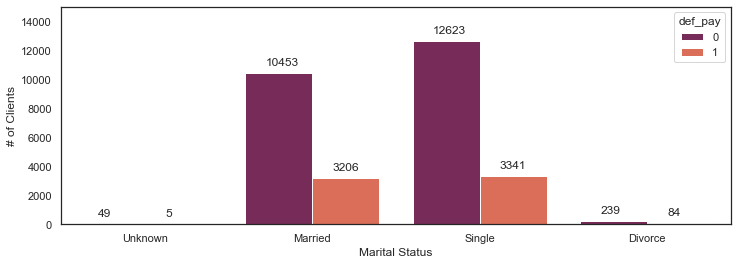

In [29]:

plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'MARRIAGE', hue="def_pay", palette = 'rocket')

plt.xlabel("Marital Status", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,15000)
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+500))

plt.show()

#### Education , Marriage and Sex

In [30]:
df.groupby(by=['MARRIAGE', 'SEX'])['def_pay'].value_counts(normalize = True)


MARRIAGE  SEX  def_pay
0         1    0          0.857143
               1          0.142857
          2    0          0.925000
               1          0.075000
1         1    0          0.740655
               1          0.259345
          2    0          0.780375
               1          0.219625
2         1    0          0.773386
               1          0.226614
          2    0          0.802784
               1          0.197216
3         1    0          0.694656
               1          0.305344
          2    0          0.770833
               1          0.229167
Name: def_pay, dtype: float64

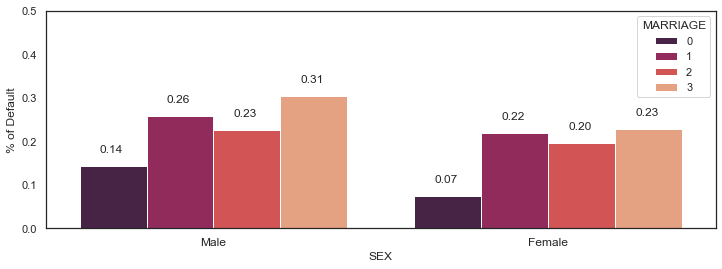

In [31]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "SEX", y = "def_pay", hue = "MARRIAGE", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.06, p.get_height()+0.03),fontsize=12)

plt.show()

In [32]:
df.groupby(by=['EDUCATION', 'SEX'])['def_pay'].value_counts(normalize = True)


EDUCATION  SEX  def_pay
1          1    0          0.791915
                1          0.208085
           2    0          0.818649
                1          0.181351
2          1    0          0.737998
                1          0.262002
           2    0          0.777957
                1          0.222043
3          1    0          0.726131
                1          0.273869
           2    0          0.763580
                1          0.236420
4          1    0          0.904762
                1          0.095238
           2    0          0.962963
                1          0.037037
5          1    0          0.921875
                1          0.078125
           2    0          0.926267
                1          0.073733
Name: def_pay, dtype: float64

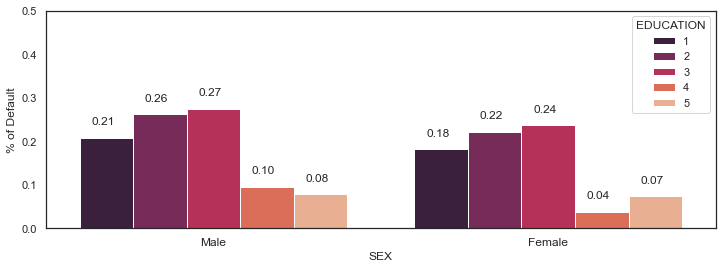

In [33]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "SEX", y = "def_pay", hue = "EDUCATION", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.035, p.get_height()+0.03),fontsize=12)

plt.show()

##### Amount of grived Credit + Demographique features 

##### Non-Defaulter vs Defaulter within Specific Credit Limit Group

C:\Users\Dhia\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


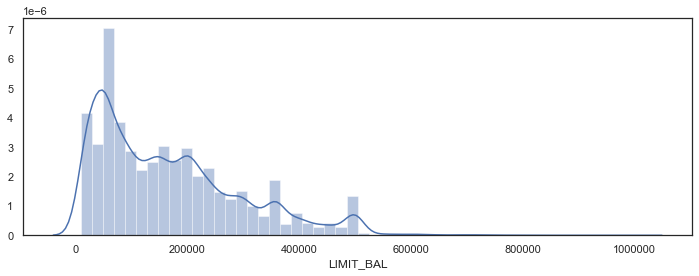

In [34]:
plt.figure(figsize=(12,4))
sns.distplot(df['LIMIT_BAL'])
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.show()

This expresses the number of defaulters and non-defaulters in each different credit limit group. The plot confirms our conjecture about the relations between number of defaulters and credit limit. When the credit limit is below the average, the number of defaulters is obviously higher than the number of non-defaulters. The difference nearly doubles for some specific low credit limit. As the credit limit goes beyond the average, the number of non-defaulters gradually increases within each group and most of them are larger than the number of defaulters. The amounts of 50,000 credit limit has the largest defaults number, as well as 20,000 and 30,000 credit limits

In [35]:
df['LimitBin'] = pd.cut(df['LIMIT_BAL'],[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])
print(df['LimitBin'].value_counts())

(5000, 50000]        7676
(200000, 300000]     5059
(50000, 100000]      4822
(150000, 200000]     3978
(100000, 150000]     3902
(300000, 400000]     2759
(400000, 500000]     1598
(500000, 1100000]     206
Name: LimitBin, dtype: int64


In [36]:
df['def_pay'].groupby(df['LimitBin']).value_counts(normalize = True)

LimitBin           def_pay
(5000, 50000]      0          0.682126
                   1          0.317874
(50000, 100000]    0          0.742016
                   1          0.257984
(100000, 150000]   0          0.788570
                   1          0.211430
(150000, 200000]   0          0.821518
                   1          0.178482
(200000, 300000]   0          0.839494
                   1          0.160506
(300000, 400000]   0          0.859369
                   1          0.140631
(400000, 500000]   0          0.878598
                   1          0.121402
(500000, 1100000]  0          0.888350
                   1          0.111650
Name: def_pay, dtype: float64

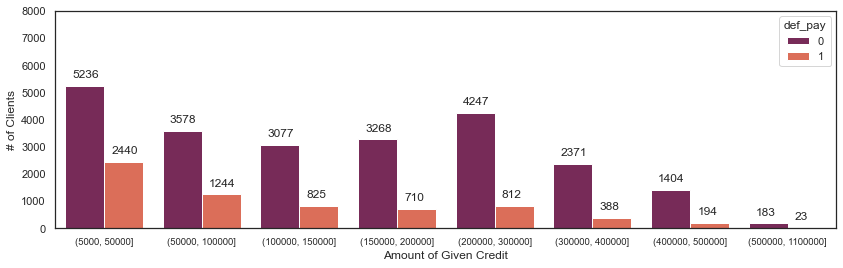

In [37]:
plt.figure(figsize=(14,4))

df['LimitBin'] = df['LimitBin'].astype('str')
LimitBin_order = ['(5000, 50000]', '(50000, 100000]', '(100000, 150000]', '(150000, 200000]',
                '(200000, 300000]', '(300000, 400000]', '(400000, 500000]', '(500000, 1100000]']

ax = sns.countplot(data = df, x = 'LimitBin', hue="def_pay", palette = 'rocket', order = LimitBin_order)

plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,8000)
ax.tick_params(axis="x", labelsize= 9.5)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

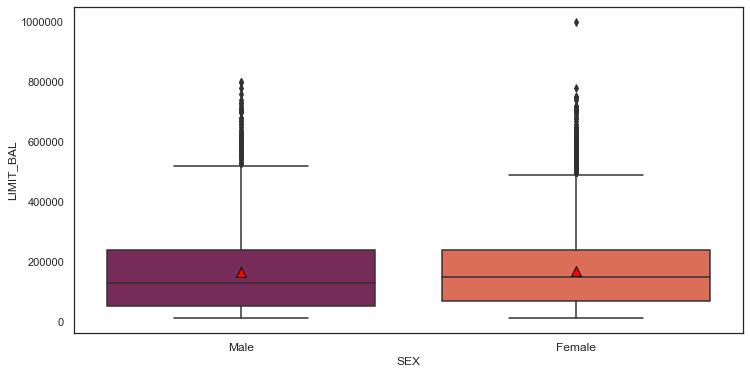

In [38]:
plt.figure(figsize=(12,6))

sns.boxplot(x = "SEX", y = "LIMIT_BAL",data = df, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

plt.show()

In [39]:
df.groupby('EDUCATION')['LIMIT_BAL'].mean()

EDUCATION
1    212956.069910
2    147062.437634
3    126550.270490
4    220894.308943
5    167205.797101
Name: LIMIT_BAL, dtype: float64

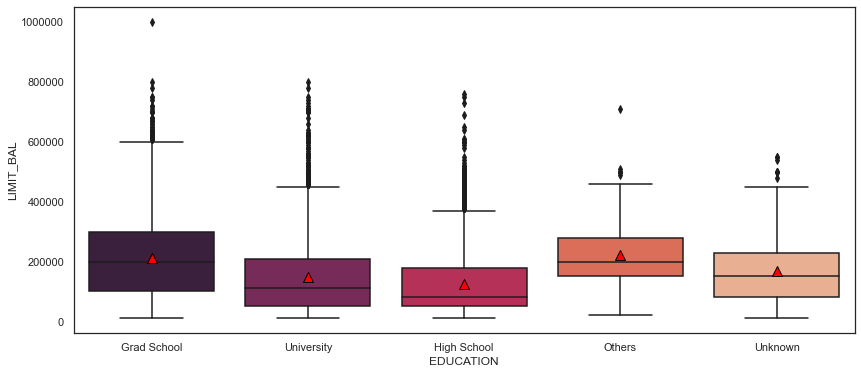

In [40]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "EDUCATION", y = "LIMIT_BAL", data = df, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation   
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)

plt.show()

In [41]:
df.groupby('MARRIAGE')['LIMIT_BAL'].mean()


MARRIAGE
0    132962.962963
1    182200.893184
2    156413.660737
3     98080.495356
Name: LIMIT_BAL, dtype: float64

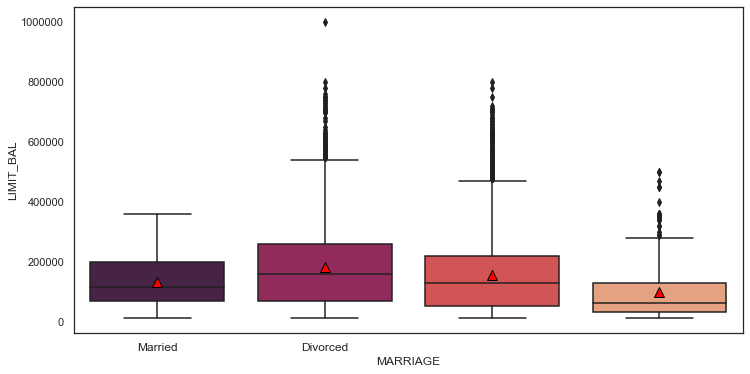

In [42]:
plt.figure(figsize=(12,6))

sns.boxplot(x = "MARRIAGE", y = "LIMIT_BAL",data = df, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xticks([0,1],['Married', 'Divorced'], fontsize = 12)

plt.show()

In [43]:
df.groupby('AgeBin')['LIMIT_BAL'].mean()

AgeBin
(20, 25]     73763.885301
(25, 30]    164320.918510
(30, 35]    197688.060732
(35, 40]    196780.557250
(40, 50]    179680.213156
(50, 60]    159349.023535
(60, 80]    201617.647059
Name: LIMIT_BAL, dtype: float64

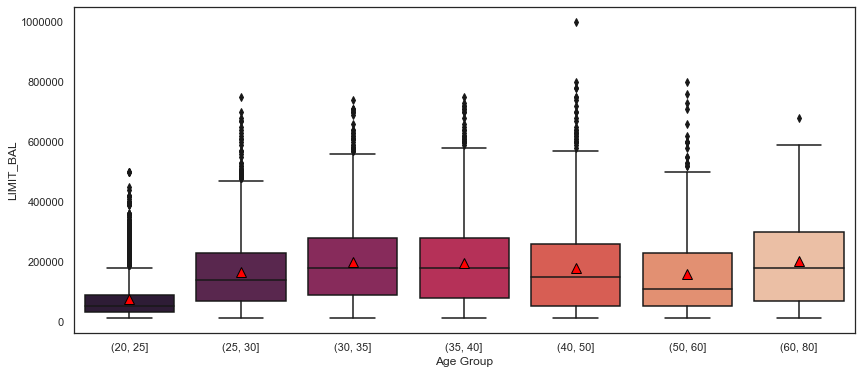

In [44]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "AgeBin", y = "LIMIT_BAL",data = df, palette = 'rocket', order = AgeBin_order, showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xlabel("Age Group", fontsize= 12)

plt.show()


We saw earlier that the average given credit for women was slightly higher than for men. That still holds up for several combinations of categories.

#### Repayment Status

C:\Users\Dhia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dhia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dhia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dhia\anaconda3\lib\site-p

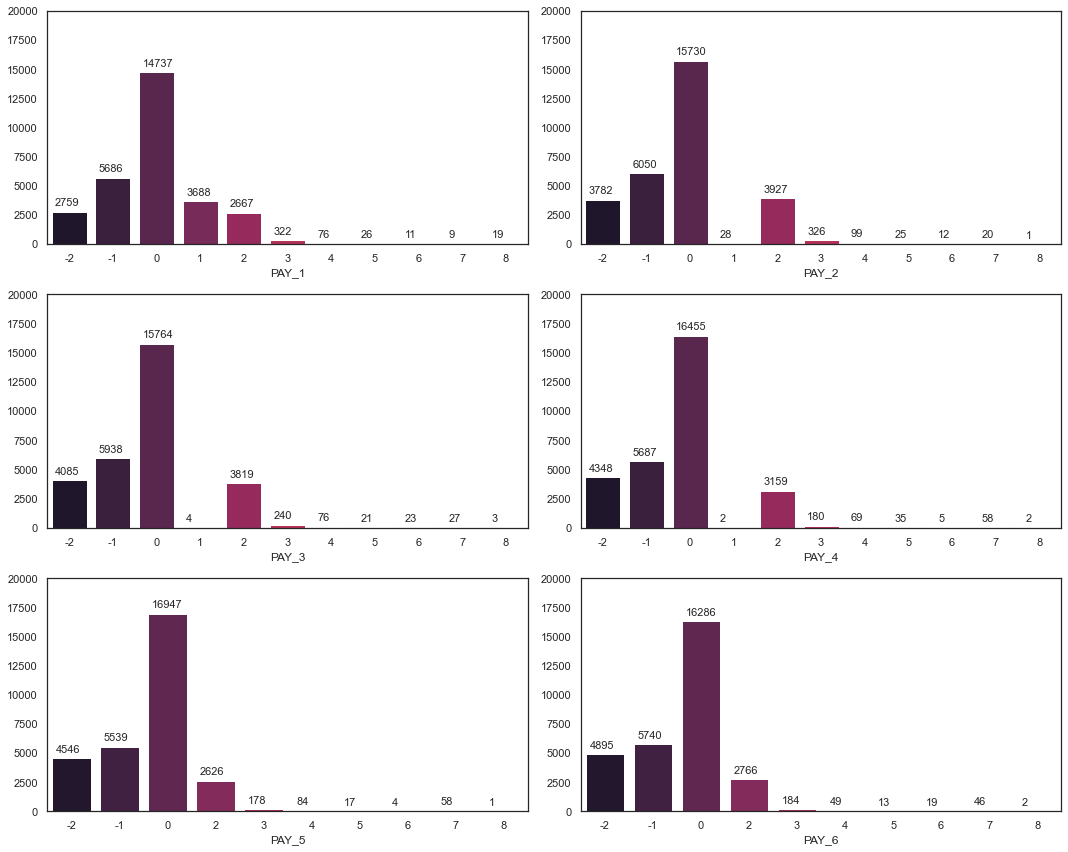

In [45]:
pay_x_fts = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_fts):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(df.loc[:,col], palette = 'rocket')
    plt.ylim(0,20000)
    plt.ylabel('')
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.08, p.get_height()+500), fontsize = 11)

plt.show()

Since there are only a few customers with 4+ months of delay in all PAY_X features, we could make a new analysis with them all together just to have the average default of a more significant group.

In [46]:
df['PAY_1_new'] = df['PAY_1'].copy()
df['PAY_2_new'] = df['PAY_2'].copy()
df['PAY_3_new'] = df['PAY_3'].copy()
df['PAY_4_new'] = df['PAY_4'].copy()
df['PAY_5_new'] = df['PAY_5'].copy()
df['PAY_6_new'] = df['PAY_6'].copy()

In [47]:
pay_x_new = ['PAY_1_new', 'PAY_2_new', 'PAY_3_new', 'PAY_4_new', 'PAY_5_new', 'PAY_6_new']

for col in pay_x_new:  
    df.loc[:,col] = df.loc[:,col].replace(5,4)
    df.loc[:,col] = df.loc[:,col].replace(6,4)
    df.loc[:,col] = df.loc[:,col].replace(7,4)
    df.loc[:,col] = df.loc[:,col].replace(8,4)

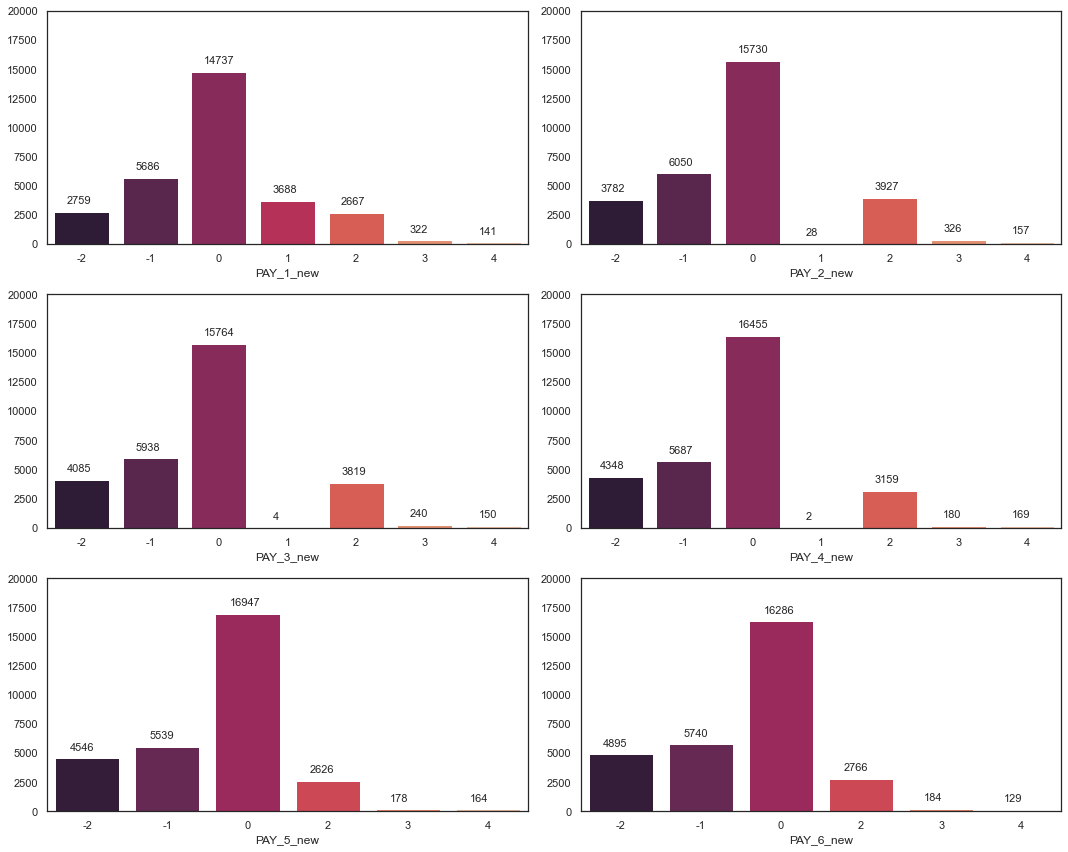

In [48]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_new):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(data = df, x = col, palette = 'rocket')
    plt.ylim(0,20000)
    plt.ylabel('')
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.180, p.get_height()+700), fontsize = 11)

plt.show()

#### BILL_Statement

C:\Users\Dhia\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dhia\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dhia\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

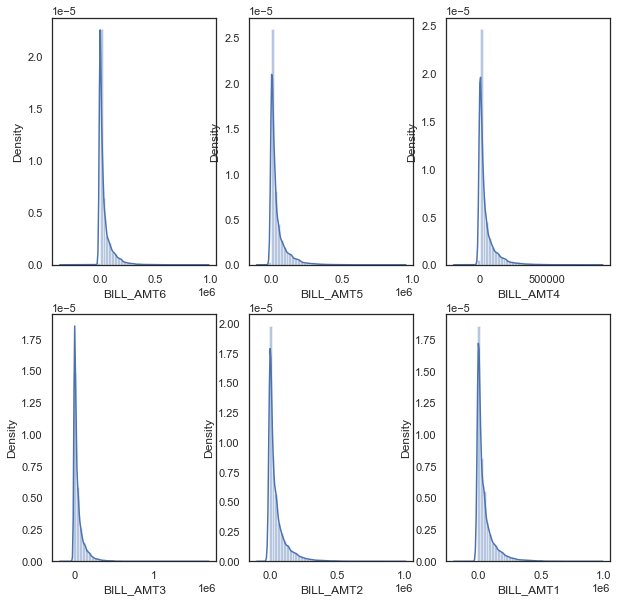

In [49]:
fig,ax = plt.subplots(2,3, figsize=(10,10))               # 'ax' has references to all the four axes
sns.distplot(df['BILL_AMT6'], ax = ax[0,0]) 
sns.distplot(df['BILL_AMT5'], ax = ax[0,1]) 
sns.distplot(df['BILL_AMT4'], ax = ax[0,2]) 
sns.distplot(df['BILL_AMT3'], ax = ax[1,0]) 
sns.distplot(df['BILL_AMT2'], ax = ax[1,1]) 
sns.distplot(df['BILL_AMT1'], ax = ax[1,2])
 
plt.show()

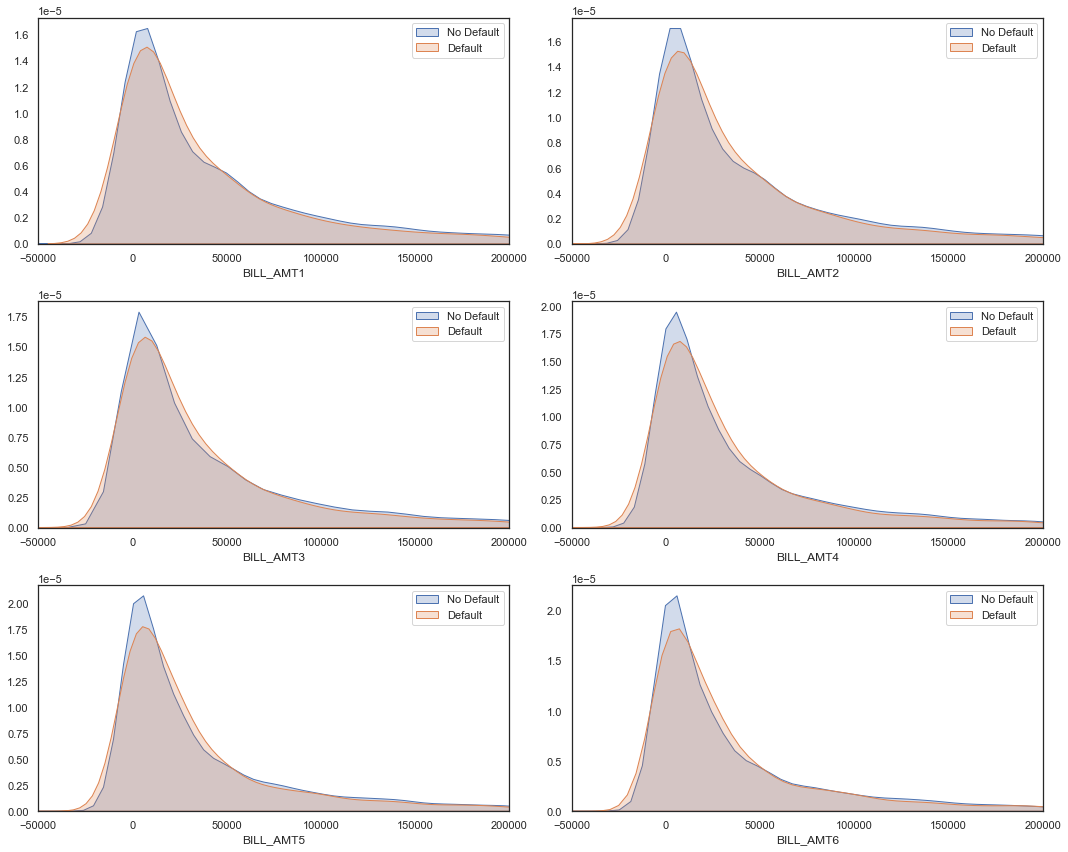

In [50]:
bill_amtx_fts = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_fts):    
    plt.subplot(3,2,i + 1)    
    sns.kdeplot(df.loc[(df['def_pay'] == 0), col], label = 'No Default', shade = True)
    sns.kdeplot(df.loc[(df['def_pay'] == 1), col], label = 'Default', shade = True)
    plt.xlim(-50000,200000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

In [51]:
df['BILL_AMT1_bin'] = df['BILL_AMT1'].copy()
df['BILL_AMT2_bin'] = df['BILL_AMT2'].copy()
df['BILL_AMT3_bin'] = df['BILL_AMT3'].copy()
df['BILL_AMT4_bin'] = df['BILL_AMT4'].copy()
df['BILL_AMT5_bin'] = df['BILL_AMT5'].copy()
df['BILL_AMT6_bin'] = df['BILL_AMT6'].copy()

In [52]:
bill_amtx_bins = ['BILL_AMT1_bin', 'BILL_AMT2_bin', 'BILL_AMT3_bin', 'BILL_AMT4_bin', 'BILL_AMT5_bin', 'BILL_AMT6_bin']

for i, col in enumerate (bill_amtx_bins):
    df[col] = pd.cut(df[bill_amtx_fts[i]],[-350000,-1,0,25000, 75000, 200000, 2000000])
    print(df[col].value_counts())

(0, 25000]           12965
(25000, 75000]        7656
(75000, 200000]       5258
(-1, 0]               2008
(200000, 2000000]     1523
(-350000, -1]          590
Name: BILL_AMT1_bin, dtype: int64
(0, 25000]           12647
(25000, 75000]        7692
(75000, 200000]       5094
(-1, 0]               2506
(200000, 2000000]     1392
(-350000, -1]          669
Name: BILL_AMT2_bin, dtype: int64
(0, 25000]           12696
(25000, 75000]        7635
(75000, 200000]       4888
(-1, 0]               2870
(200000, 2000000]     1256
(-350000, -1]          655
Name: BILL_AMT3_bin, dtype: int64
(0, 25000]           13081
(25000, 75000]        7401
(75000, 200000]       4623
(-1, 0]               3195
(200000, 2000000]     1025
(-350000, -1]          675
Name: BILL_AMT4_bin, dtype: int64
(0, 25000]           13401
(25000, 75000]        7163
(75000, 200000]       4399
(-1, 0]               3506
(200000, 2000000]      876
(-350000, -1]          655
Name: BILL_AMT5_bin, dtype: int64
(0, 25000]          

In [53]:
for col in bill_amtx_bins:
    print(df['def_pay'].groupby(df[col]).value_counts(normalize = True))

BILL_AMT1_bin      def_pay
(-350000, -1]      0          0.815254
                   1          0.184746
(-1, 0]            0          0.734064
                   1          0.265936
(0, 25000]         0          0.774470
                   1          0.225530
(25000, 75000]     0          0.775209
                   1          0.224791
(75000, 200000]    0          0.802396
                   1          0.197604
(200000, 2000000]  0          0.797111
                   1          0.202889
Name: def_pay, dtype: float64
BILL_AMT2_bin      def_pay
(-350000, -1]      0          0.810164
                   1          0.189836
(-1, 0]            0          0.753791
                   1          0.246209
(0, 25000]         0          0.775836
                   1          0.224164
(25000, 75000]     0          0.773531
                   1          0.226469
(75000, 200000]    0          0.799176
                   1          0.200824
(200000, 2000000]  0          0.790230
                   

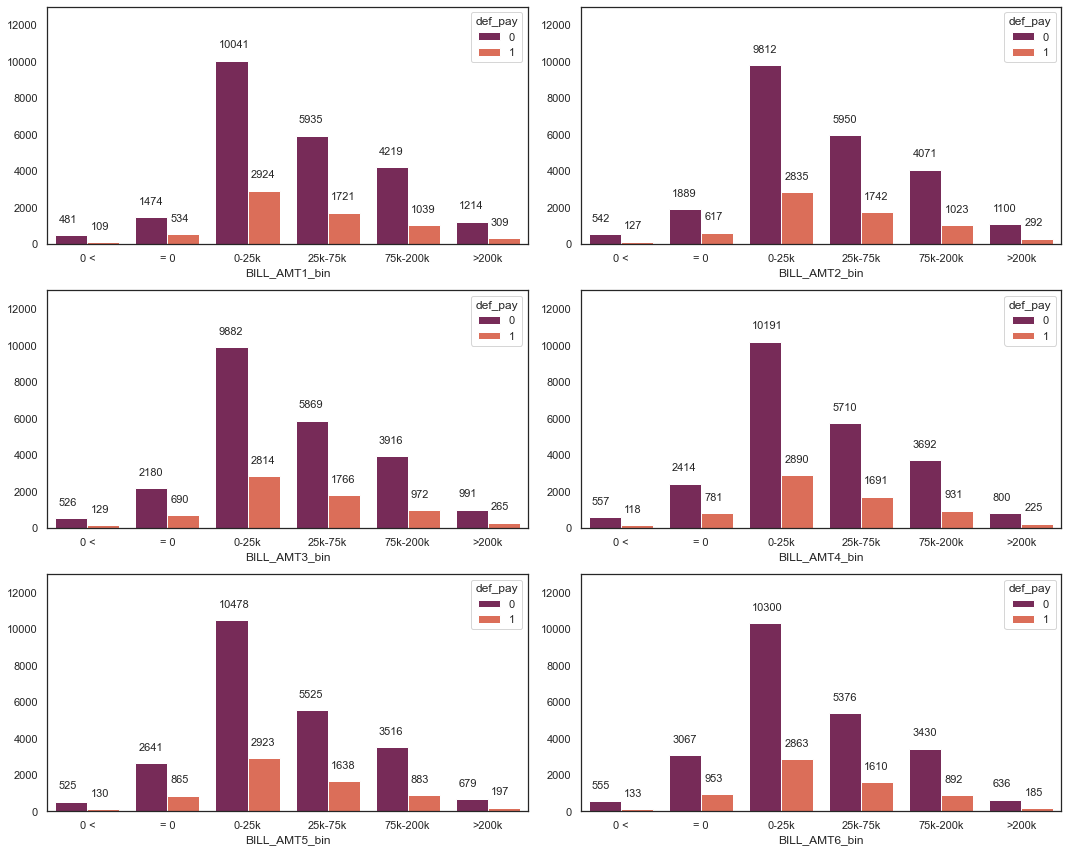

In [54]:
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(data = df, x = col, hue="def_pay", palette = 'rocket')
    plt.ylim(0,13000)
    plt.ylabel('')
    plt.xticks([0,1,2,3,4,5],['0 <', '= 0', '0-25k', '25k-75k', '75k-200k', '>200k'], fontsize = 11)
    plt.tight_layout()

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.04, p.get_height()+700), fontsize = 11)    
        
plt.show()

#### Pay Amount

C:\Users\Dhia\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dhia\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dhia\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

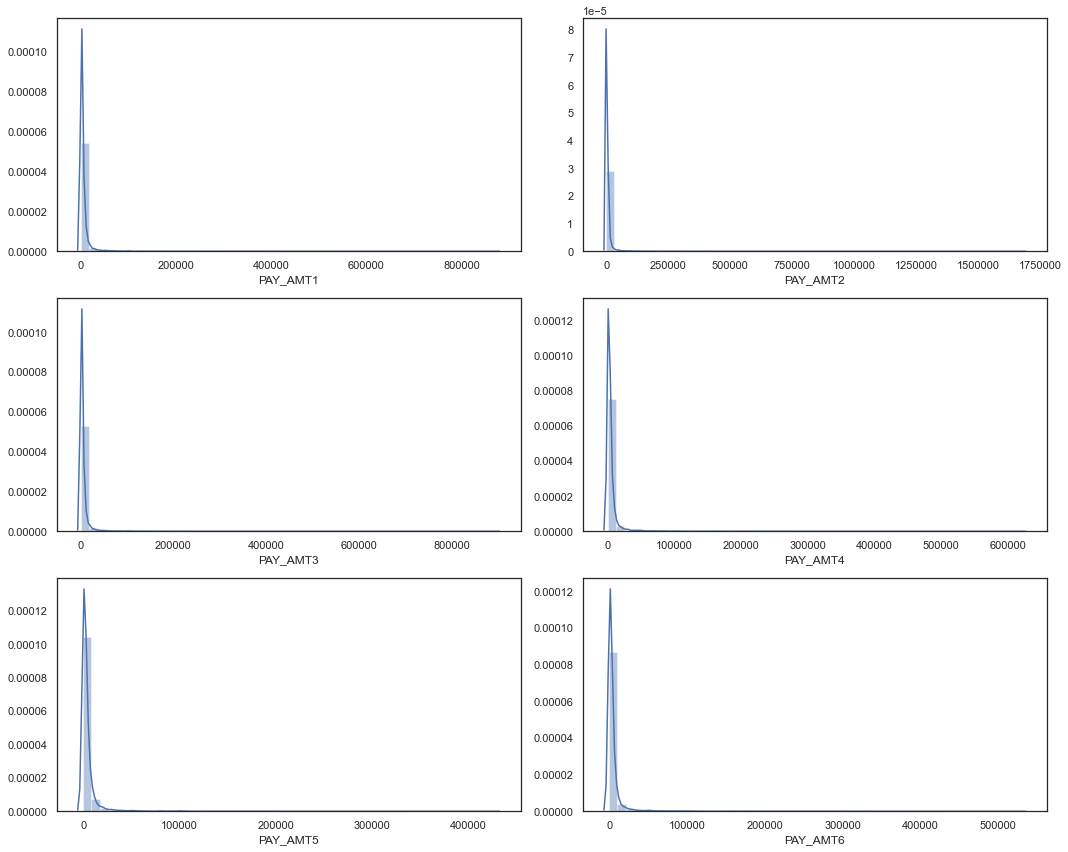

In [55]:
pay_amtx_fts = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_amtx_fts):    
    plt.subplot(3,2,i + 1)
    sns.distplot(df.loc[:,col])
    plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation
    plt.ylabel('')
    plt.tight_layout()

plt.show()

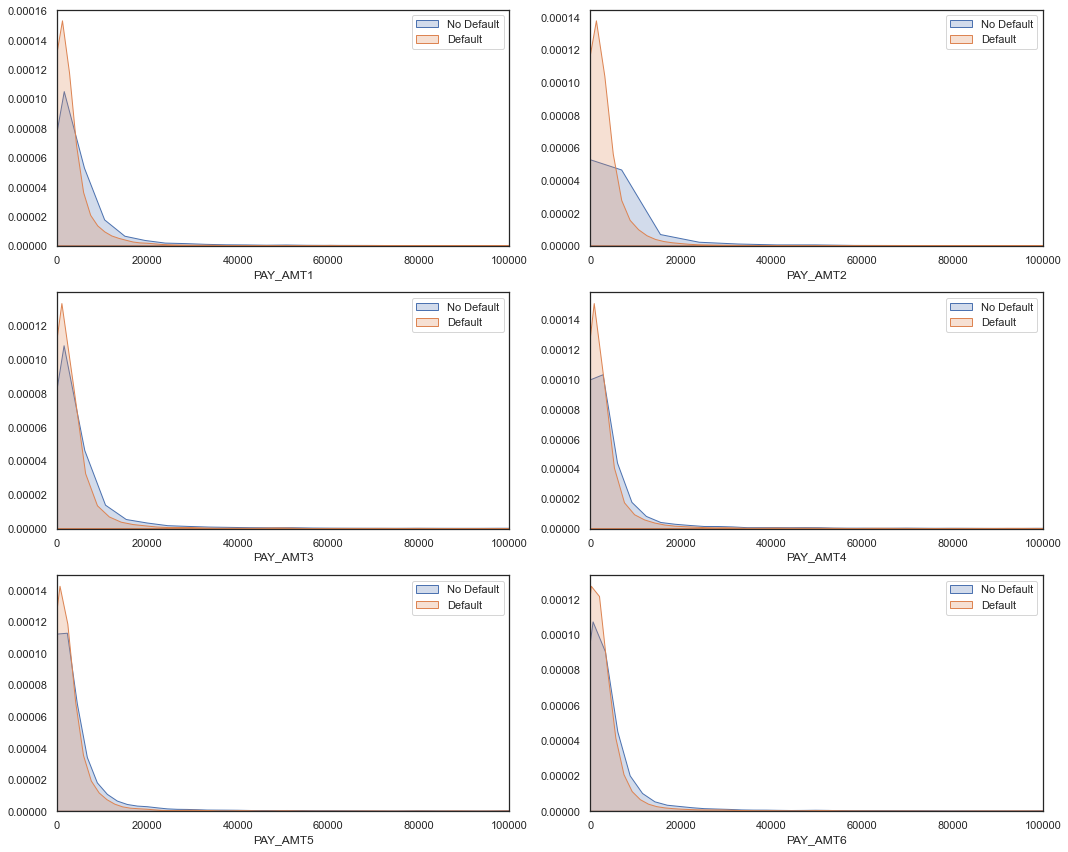

In [56]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_amtx_fts):    
    plt.subplot(3,2,i + 1)    
    sns.kdeplot(df.loc[(df['def_pay'] == 0), col], label = 'No Default', shade = True)
    sns.kdeplot(df.loc[(df['def_pay'] == 1), col], label = 'Default', shade = True)
    plt.xlim(0,100000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

In [57]:
df['PAY_AMT1_bin'] = df['PAY_AMT1'].copy()
df['PAY_AMT2_bin'] = df['PAY_AMT2'].copy()
df['PAY_AMT3_bin'] = df['PAY_AMT3'].copy()
df['PAY_AMT4_bin'] = df['PAY_AMT4'].copy()
df['PAY_AMT5_bin'] = df['PAY_AMT5'].copy()
df['PAY_AMT6_bin'] = df['PAY_AMT6'].copy()

In [58]:
pay_amtx_bins = ['PAY_AMT1_bin', 'PAY_AMT2_bin', 'PAY_AMT3_bin', 'PAY_AMT4_bin', 'PAY_AMT5_bin', 'PAY_AMT6_bin']

for i, col in enumerate (pay_amtx_bins):
    df[col] = pd.cut(df[pay_amtx_fts[i]],[-1, 0, 25000, 50000, 100000, 2000000])
    print(df[col].value_counts())

(0, 25000]           23730
(-1, 0]               5249
(25000, 50000]         550
(50000, 100000]        322
(100000, 2000000]      149
Name: PAY_AMT1_bin, dtype: int64
(0, 25000]           23569
(-1, 0]               5396
(25000, 50000]         556
(50000, 100000]        283
(100000, 2000000]      196
Name: PAY_AMT2_bin, dtype: int64
(0, 25000]           23068
(-1, 0]               5968
(25000, 50000]         514
(50000, 100000]        273
(100000, 2000000]      177
Name: PAY_AMT3_bin, dtype: int64
(0, 25000]           22641
(-1, 0]               6408
(25000, 50000]         533
(50000, 100000]        271
(100000, 2000000]      147
Name: PAY_AMT4_bin, dtype: int64
(0, 25000]           22382
(-1, 0]               6703
(25000, 50000]         493
(50000, 100000]        268
(100000, 2000000]      154
Name: PAY_AMT5_bin, dtype: int64
(0, 25000]           21785
(-1, 0]               7173
(25000, 50000]         517
(50000, 100000]        300
(100000, 2000000]      225
Name: PAY_AMT6_bin, dtype

In [59]:
for col in pay_amtx_bins:
    print(df['def_pay'].groupby(df[col]).value_counts(normalize = True))

PAY_AMT1_bin       def_pay
(-1, 0]            0          0.640503
                   1          0.359497
(0, 25000]         0          0.803582
                   1          0.196418
(25000, 50000]     0          0.910909
                   1          0.089091
(50000, 100000]    0          0.919255
                   1          0.080745
(100000, 2000000]  0          0.912752
                   1          0.087248
Name: def_pay, dtype: float64
PAY_AMT2_bin       def_pay
(-1, 0]            0          0.666605
                   1          0.333395
(0, 25000]         0          0.797997
                   1          0.202003
(25000, 50000]     0          0.926259
                   1          0.073741
(50000, 100000]    0          0.936396
                   1          0.063604
(100000, 2000000]  0          0.913265
                   1          0.086735
Name: def_pay, dtype: float64
PAY_AMT3_bin       def_pay
(-1, 0]            0          0.676441
                   1          0.323559
(

Summary
After exploratory analysis we already have a picture about predictors’ impact to response variable:

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
Impact to default : The lower the amount of given credit limit of the balance owing, the bigger the chances to default. (In general)

SEX: Gender (1=male, 2=female)
Impact to default : Male persons have more chances to default. (In general)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others)
Impact to default : The better education the lower chances to default. (In general)

MARRIAGE: Marital status (1=married, 2=single, 3=others)
Impact to default : Married persons have more chances to default. (In general)

AGE: Age in years
Impact to default : The biggest chance of default is in the age group under 25 and the smallest for 25 - 34 age group.

PAY_0..6: Repayment status in September .. April, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
Impact to default : Having a delay, even for 1 month in any of the previous months, increases the chance of default.

BILL_AMT1..6: Amount of bill statement in September .. April, 2005 (NT dollar)
Impact to default : The smaller the difference between the amount owed on the bill in September and April, the bigger the chances to default. (In general)

PAY_AMT1..6: Amount of previous payment in September .. April, 2005 (NT dollar)
Impact to default : The smaller the payment amount, the bigger the chance of default. (In general)

## Data Cleaning

We see from the above that there is data that needs to be cleaned. I.e. Education column.

In [60]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT3_bin,BILL_AMT4_bin,BILL_AMT5_bin,BILL_AMT6_bin,PAY_AMT1_bin,PAY_AMT2_bin,PAY_AMT3_bin,PAY_AMT4_bin,PAY_AMT5_bin,PAY_AMT6_bin
0,1,20000,2,2,1,24,2,2,-1,-1,...,"(0, 25000]","(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]","(0, 25000]","(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]"
1,2,120000,2,2,2,26,-1,2,0,0,...,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(0, 25000]"
2,3,90000,2,2,2,34,0,0,0,0,...,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
3,4,50000,2,2,1,37,0,0,0,0,...,"(25000, 75000]","(25000, 75000]","(25000, 75000]","(25000, 75000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
4,5,50000,1,2,1,57,-1,0,-1,0,...,"(25000, 75000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(25000, 50000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,"(200000, 2000000]","(75000, 200000]","(25000, 75000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,"(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(-1, 0]"
29997,29998,30000,1,2,2,37,4,3,2,-1,...,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(-1, 0]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
29998,29999,80000,1,3,1,41,1,-1,0,0,...,"(75000, 200000]","(25000, 75000]","(0, 25000]","(25000, 75000]","(50000, 100000]","(0, 25000]","(0, 25000]","(0, 25000]","(50000, 100000]","(0, 25000]"


In [61]:
print('Education Column Values: ', df['EDUCATION'].unique())

Education Column Values:  [2 1 3 5 4]


<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

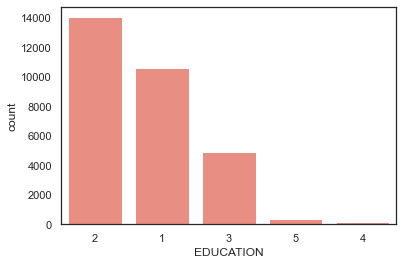

In [62]:
fig, ax = plt.subplots()
sns.countplot(data=df,x='EDUCATION', order = df['EDUCATION'].value_counts().index, color='salmon')

##### Education

Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
There are values 0, 5 and 6 in this column.
Since these are unknown (undefined), they can be grouped into the category 4: "Others"


In [63]:
df['EDUCATION'] = df['EDUCATION'].apply(lambda edu_value: edu_value 
                                        if ((edu_value > 0 and edu_value < 4)) 
                                        else 4) # Changes every value of x not within (and inclusive of) 1 ~ 3 to 4  

# Corrected changes
df['EDUCATION'].unique()

array([2, 1, 3, 4], dtype=int64)

In [64]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

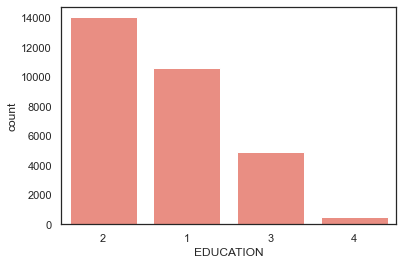

In [65]:
fig, ax = plt.subplots()
sns.countplot(data=df,x='EDUCATION', order = df['EDUCATION'].value_counts().index, color='salmon');

#### Marriage

We see from .describe() that there are some discrepancies in the marriage column

In [66]:
print("Marriage Column Values: ", df['MARRIAGE'].unique())

Marriage Column Values:  [1 2 3 0]


<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

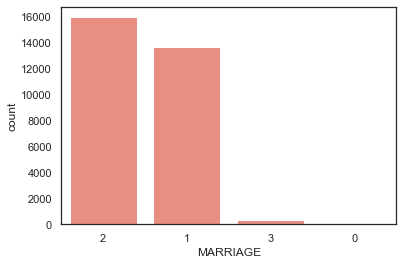

In [67]:
fig, ax = plt.subplots()
sns.countplot(data=df, x='MARRIAGE', order = df['MARRIAGE'].value_counts().index, color='salmon')

Marital status (1 = married; 2 = single; 3 = others)
IT exists 0 in this column
Since this is unknown (undefined), similar to education, they can be grouped into 3: "Others"

In [68]:
df['MARRIAGE'] = df['MARRIAGE'].apply(lambda marriage_value: marriage_value
                                     if (marriage_value > 0 and marriage_value < 3)
                                     else 3) # changes every value of x not within (and inclusive of) 1 and 2 to 3

# Corrected changes
df['MARRIAGE'].unique()

array([1, 2, 3], dtype=int64)

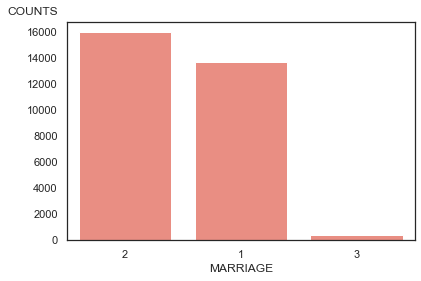

In [69]:
fig, ax = plt.subplots()
sns.countplot(data=df, x='MARRIAGE', order = df['MARRIAGE'].value_counts().index, color='salmon')
ax.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax.yaxis.set_label_coords(-0.1,1.02)

plt.tight_layout()
plt.show();

In [70]:
print("Pay Column Values: ", df['PAY_1'].unique())
print("Pay Column Values: ", df['PAY_2'].unique())
print("Pay Column Values: ", df['PAY_3'].unique())
print("Pay Column Values: ", df['PAY_4'].unique())
print("Pay Column Values: ", df['PAY_5'].unique())
print("Pay Column Values: ", df['PAY_6'].unique())

Pay Column Values:  [ 2 -1  0 -2  1  3  4  8  7  5  6]
Pay Column Values:  [ 2  0 -1 -2  3  5  7  4  1  6  8]
Pay Column Values:  [-1  0  2 -2  3  4  6  7  1  5  8]
Pay Column Values:  [-1  0 -2  2  3  4  5  7  6  1  8]
Pay Column Values:  [-2  0 -1  2  3  5  4  7  8  6]
Pay Column Values:  [-2  2  0 -1  3  6  4  7  8  5]


In [71]:

pay_x_new = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

for col in pay_x_new:  
    df.loc[:,col] = df.loc[:,col].replace(5,4)
    df.loc[:,col] = df.loc[:,col].replace(6,4)
    df.loc[:,col] = df.loc[:,col].replace(7,4)
    df.loc[:,col] = df.loc[:,col].replace(8,4)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT3_bin,BILL_AMT4_bin,BILL_AMT5_bin,BILL_AMT6_bin,PAY_AMT1_bin,PAY_AMT2_bin,PAY_AMT3_bin,PAY_AMT4_bin,PAY_AMT5_bin,PAY_AMT6_bin
0,1,20000,2,2,1,24,2,2,-1,-1,...,"(0, 25000]","(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]","(0, 25000]","(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]"
1,2,120000,2,2,2,26,-1,2,0,0,...,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(0, 25000]"
2,3,90000,2,2,2,34,0,0,0,0,...,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
3,4,50000,2,2,1,37,0,0,0,0,...,"(25000, 75000]","(25000, 75000]","(25000, 75000]","(25000, 75000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
4,5,50000,1,2,1,57,-1,0,-1,0,...,"(25000, 75000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(25000, 50000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,"(200000, 2000000]","(75000, 200000]","(25000, 75000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,"(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(-1, 0]"
29997,29998,30000,1,2,2,37,4,3,2,-1,...,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(-1, 0]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
29998,29999,80000,1,3,1,41,1,-1,0,0,...,"(75000, 200000]","(25000, 75000]","(0, 25000]","(25000, 75000]","(50000, 100000]","(0, 25000]","(0, 25000]","(0, 25000]","(50000, 100000]","(0, 25000]"


C:\Users\Dhia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dhia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dhia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dhia\anaconda3\lib\site-p

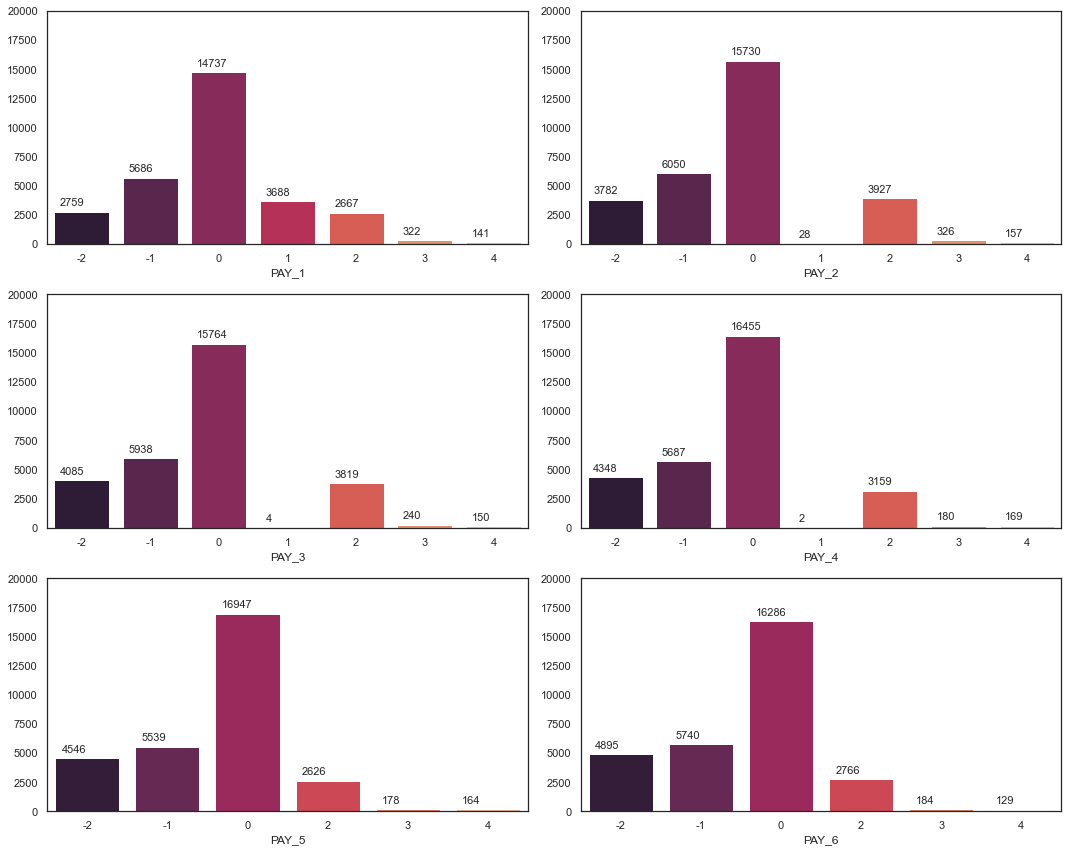

In [72]:
pay_x_fts = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_fts):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(df.loc[:,col], palette = 'rocket')
    plt.ylim(0,20000)
    plt.ylabel('')
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.08, p.get_height()+500), fontsize = 11)

plt.show()

## Modeling

In [73]:
df.shape

(30000, 45)

In [74]:
X = df.copy().drop('def_pay', axis = 1)
y = df['def_pay']

In [75]:
df_base = X.copy().drop(pay_x_new, axis = 1)
df_base = df_base.drop(bill_amtx_bins, axis = 1)
df_base = df_base.drop(pay_amtx_bins, axis = 1)
df_base = df_base.drop(['AgeBin', 'LimitBin'], axis = 1)
df_base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_1_new,PAY_2_new,PAY_3_new,PAY_4_new,PAY_5_new,PAY_6_new
0,1,20000,2,2,1,24,3913,3102,689,0,...,0,0,0,0,2,2,-1,-1,-2,-2
1,2,120000,2,2,2,26,2682,1725,2682,3272,...,1000,1000,0,2000,-1,2,0,0,0,2
2,3,90000,2,2,2,34,29239,14027,13559,14331,...,1000,1000,1000,5000,0,0,0,0,0,0
3,4,50000,2,2,1,37,46990,48233,49291,28314,...,1200,1100,1069,1000,0,0,0,0,0,0
4,5,50000,1,2,1,57,8617,5670,35835,20940,...,10000,9000,689,679,-1,0,-1,0,0,0


### Model Eval Function

In [76]:
#Model Evaluation function 
def model_eval(algo, Xtrain,ytrain,Xtest,ytest):
    from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report,auc

    algo.fit(Xtrain,ytrain)
    y_pred = algo.predict(Xtrain)
    y_train_prob = algo.predict_proba(Xtrain)[:,1]

    #print('confusion matrix-train\n',confusion_matrix(ytrain,y_pred))
    print('Overall Train Accuracy',accuracy_score(ytrain,y_pred))
    print('Train AUC Score',roc_auc_score(ytrain,y_train_prob))

    y_test_pred = algo.predict(Xtest)
    y_test_prob = algo.predict_proba(Xtest)[:,1]


    #print('confusion matrix-test\n',confusion_matrix(ytest,y_test_pred))
    print('Overall Test Accuracy',accuracy_score(ytest,y_test_pred))
    print('Test AUC Score',roc_auc_score(ytest,y_test_prob))
    print('Classification Report of Test\n',  classification_report(ytest, y_test_pred))
    
    
    kf = KFold(n_splits = 5,shuffle = True,random_state = 42)
    score=[]
    for train_idx,test_idx in kf.split(Xtrain,ytrain):
        xtrain_k,xtest_k = Xtrain.iloc[train_idx,:],Xtrain.iloc[test_idx,:]
        ytrain_k,ytest_k = ytrain.iloc[train_idx],ytrain.iloc[test_idx]
        algo.fit(xtrain_k,ytrain_k)
        y_pred_k = algo.predict(xtest_k)
        roc = roc_auc_score(ytest_k,y_pred_k)
        score.append(roc)
    print('K-Fold scores: %0.03f (+/- %0.5f)' % (np.mean(score),np.var(score,ddof=1)))
    
    f,ax =  plt.subplots(1,2,figsize=(14,6))
    #plt.figure(figsize=(6,4))
    ConfMatrix = confusion_matrix(ytest,y_test_pred)
    sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
    ax[0].set_ylabel('True label')
    ax[0].set_xlabel('Predicted label')
    ax[0].set_title('Confusion Matrix')

    global fpr,tpr,thresholds
    fpr,tpr,thresholds = roc_curve(ytest,y_test_prob)
    roc_auc2 = auc(fpr, tpr)
    ax[1].plot(fpr,tpr,color = 'r')
    ax[1].plot(fpr,fpr,color = 'green')
    ax[1].set_ylabel('TPR')
    ax[1].set_xlabel('FPR')
    ax[1].set_title('ROC curve (area = %0.2f)'% roc_auc2)
    plt.show()

### Data Split

In [77]:
X_train,X_test, y_train, y_test = train_test_split(df_base,y, test_size=0.2,stratify=y, random_state=42)

#### Feature Importance Described by RandomForest

In [78]:
rf_model = RandomForestClassifier(random_state = 42)

rf_model.fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)

print("Test Accuracy: ",metrics.accuracy_score(y_test, pred_rf))

Test Accuracy:  0.814


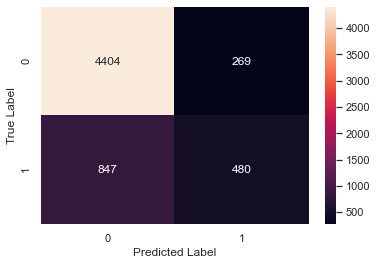

In [79]:
rf_confusion_matrix = metrics.confusion_matrix(y_test, pred_rf)
sns.heatmap(rf_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [80]:
print(metrics.classification_report(y_test, pred_rf, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.64      0.36      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



ROC_AUC:  0.7622026904707266


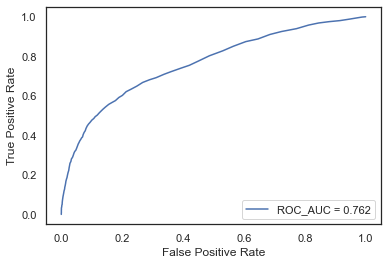

In [81]:
rf_pred_proba = rf_model.predict_proba(X_test)[:,1]

rf_roc_auc = metrics.roc_auc_score(y_test, rf_pred_proba)
print('ROC_AUC: ', rf_roc_auc)

rf_fpr, rf_tpr, thresholds = metrics.roc_curve(y_test, rf_pred_proba)

plt.plot(rf_fpr,rf_tpr, label = 'ROC_AUC = %0.3f' % rf_roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

<AxesSubplot:>

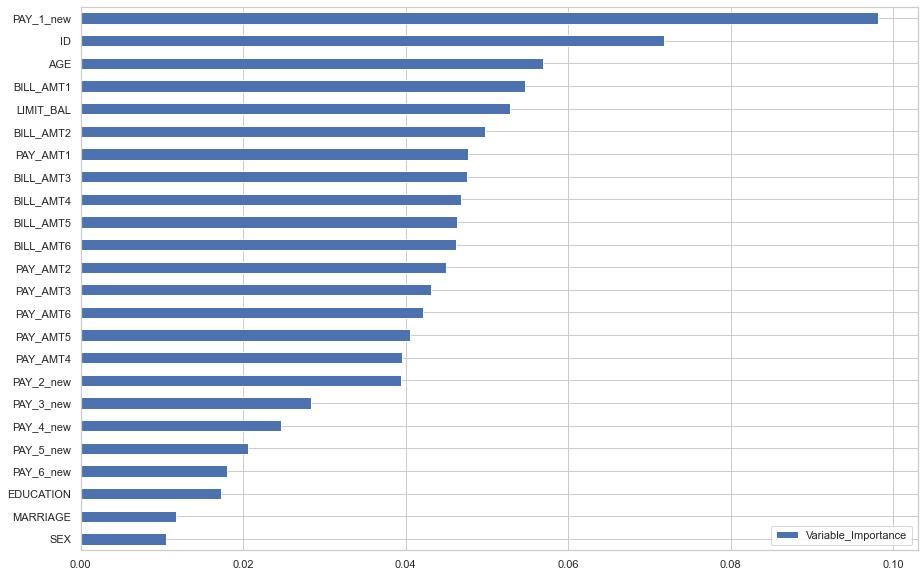

In [82]:
# This line instantiates the model. 
rf = RandomForestClassifier() 

# Fit the model on your training data.
rf.fit(X_train, y_train) 

# Obtain the feature importance
feature_importance = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['Variable_Importance']).sort_values('Variable_Importance',ascending=True)

# Set seaborn contexts 
sns.set(style="whitegrid")

feature_importance.plot.barh(figsize=(15,10))

In [83]:

#Centrage Réduction des données avec la méthode MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.fit_transform(X_test)
X_train11 = pd.DataFrame(X_train1)
X_test11 = pd.DataFrame(X_test1)


### Naive Gaussian

Naive Bayes Classifiers are based on the Bayes Theorem (Conditional probability). One assumption taken is the strong independence assumptions between the features.

 These classifiers assume that the value of a particular feature is independent of the value of any other feature. Naive Bayes Classifiers have simple design and implementation.

In [84]:
model = GaussianNB()
# fit the model with the training data
model.fit(X_train1, y_train)

# predict the target on the train dataset
predict_train = model.predict(X_train1)
# Accuray Score on train dataset
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy: %0.2f"% (metrics.accuracy_score(y_train, predict_train)*100))


# predict the target on the test dataset
predict_test = model.predict(X_test1)
#print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(predict_test,y_test)*100 
print('accuracy_score on test dataset :%0.2f '%accuracy_test)


Gaussian Naive Bayes model accuracy: 75.53
accuracy_score on test dataset :76.07 


Overall Train Accuracy 0.7553333333333333
Train AUC Score 0.7361872409434843
Overall Test Accuracy 0.7606666666666667
Test AUC Score 0.7136659135171973
Classification Report of Test
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      4673
           1       0.46      0.53      0.49      1327

    accuracy                           0.76      6000
   macro avg       0.66      0.68      0.67      6000
weighted avg       0.77      0.76      0.77      6000

K-Fold scores: 0.698 (+/- 0.00001)


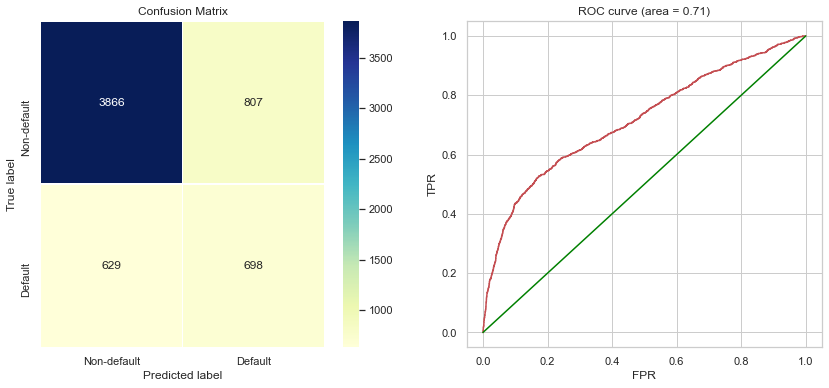

In [85]:
X_train_1= pd.DataFrame(X_train1)
X_test_1 = pd.DataFrame(X_test1)
model_eval(GaussianNB(),X_train_1,y_train,X_test_1,y_test)

#### K Nearest Neighbors:

1. Calculate the score for k between 1 and 40

2. For each iteration, the mean score for the predicted values

3. of the test set is calculated and saved from the score list.

4. Test k from 1 to 40 and distance Manhattan  ===> d(A,B)=|Xb-Xa|+|Yb-Ya|

In [86]:
score = []
for i in range(1, 40):
    knn = KNeighborsClassifier(i,metric='manhattan')
    knn_model = knn.fit(X_train1, y_train)
    pred_i = knn_model.predict(X_test1)
    score.append(knn_model.score(X_test1, y_test))

- graphic representation :

Text(0, 0.5, 'score')

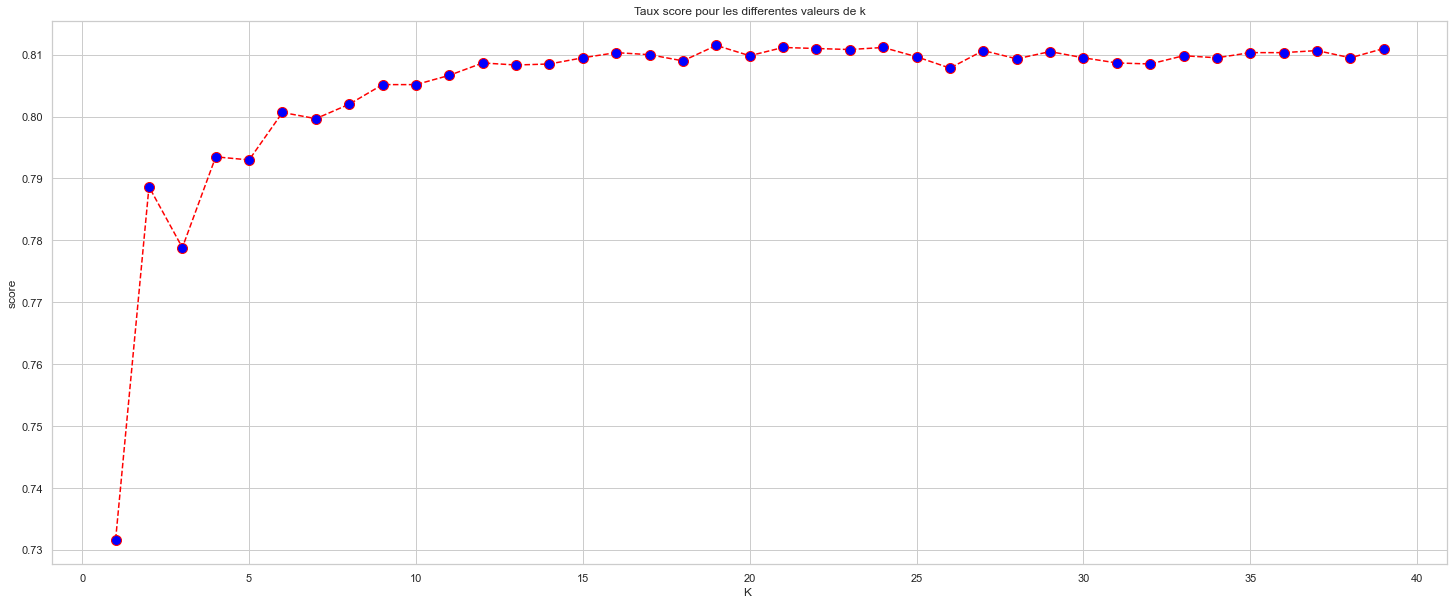

In [87]:
plt.figure(figsize=(25,10))
plt.plot(range(1, 40), score, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux score pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('score')

- Redo the training with the best value of K :

In [88]:

knn = KNeighborsClassifier(19)
knn_model = knn.fit(X_train1, y_train)
y_pred_knn = knn_model.predict(X_test1)

- Accuracy for train and test :

In [89]:

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train1, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test1, y_test)))

Accuracy of K-NN classifier on training set: 0.82
Accuracy of K-NN classifier on test set: 0.81


- Classification report : 

In [90]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4673
           1       0.64      0.32      0.43      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.64      0.66      6000
weighted avg       0.79      0.81      0.79      6000



- Roc Representation 

In [91]:
from sklearn.metrics import roc_curve, auc
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred_knn)
roc_auc2 = auc(fpr2, tpr2)


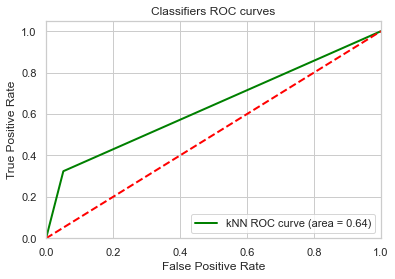

In [92]:
plt.figure() 

plt.plot(fpr2, tpr2, color='green', lw=2, label='kNN ROC curve (area = %0.2f)'% roc_auc2)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

- KNN Model_score

In [93]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred_knn)
acc = accuracy_score(y_test, y_pred_knn)
prec = precision_score(y_test, y_pred_knn)
rec = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
res = pd.DataFrame([['K-Nearest Neighbour', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
res

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,K-Nearest Neighbour,0.810333,0.640835,0.324039,0.43043,0.636233


- Another representation for the KNN Methode (with Model Eval Function) :

Overall Train Accuracy 0.8204166666666667
Train AUC Score 0.8101057649411267
Overall Test Accuracy 0.8103333333333333
Test AUC Score 0.7318151170983206
Classification Report of Test
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      4673
           1       0.64      0.32      0.43      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.64      0.66      6000
weighted avg       0.79      0.81      0.79      6000

K-Fold scores: 0.630 (+/- 0.00005)


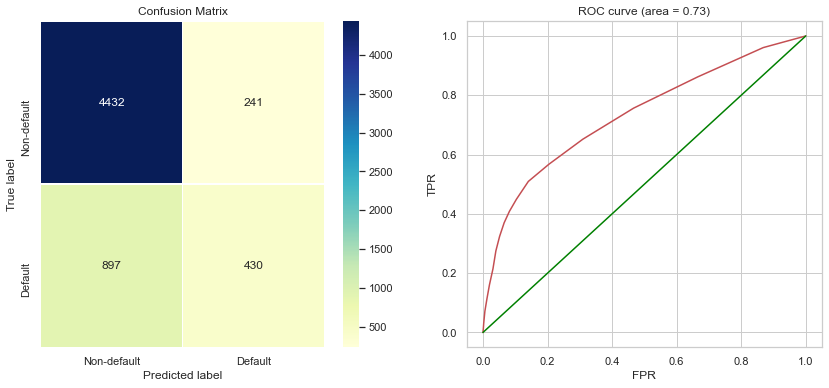

In [94]:
model_eval(KNeighborsClassifier(19),X_train11,y_train,X_test11,y_test)

#### SVM

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm

In [96]:
classifier = svm.SVC(kernel='linear')

In [97]:
#training the support vector machine classifier
classifier.fit(X_train1, y_train)

SVC(kernel='linear')

In [98]:
X_train_Prediction = classifier.predict(X_train1)
train_accuracy= accuracy_score(X_train_Prediction,y_train)
print("the accuracy is : ", train_accuracy)
X_test_Prediction = classifier.predict(X_test)
test_accuracy= accuracy_score(X_test_Prediction, y_test)
print("the accuracy is : ", test_accuracy)

the accuracy is :  0.809875
the accuracy is :  0.7035


In [99]:
print(classification_report(y_test, X_test_Prediction))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      4673
           1       0.34      0.35      0.34      1327

    accuracy                           0.70      6000
   macro avg       0.57      0.58      0.58      6000
weighted avg       0.71      0.70      0.71      6000



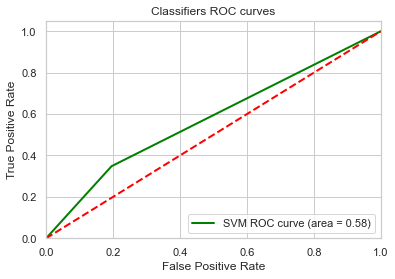

In [100]:
fpr2, tpr2, threshold2 = roc_curve(y_test, X_test_Prediction)
roc_auc2 = auc(fpr2, tpr2)
plt.figure() 

plt.plot(fpr2, tpr2, color='green', lw=2, label='SVM ROC curve (area = %0.2f)'% roc_auc2)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

#### DownSampling, OverSampling, Decision tree

In [101]:
# create the training df by remerging X_train and y_train
df_train = X_train11.join(y_train)

In [102]:
# Separate majority and minority classes
df_majority = df_train[df_train.def_pay == 0]
df_minority = df_train[df_train.def_pay == 1]

df_majority.def_pay.count()
df_minority.def_pay.count()
df_train.def_pay.value_counts()

0.0    14961
1.0     4284
Name: def_pay, dtype: int64

In [103]:
#Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples = 18691,    # to match majority class
                                 random_state= 42) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.def_pay.value_counts()

1.0    18691
0.0    14961
Name: def_pay, dtype: int64

In [104]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=5309,     # to match minority class
                                 random_state=42) # reproducible results
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
# Display new class counts
df_downsampled.def_pay.value_counts()

0.0    5309
1.0    4284
Name: def_pay, dtype: int64

In [105]:
from imblearn.over_sampling import SMOTE

In [106]:
sm = SMOTE(random_state=42)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)
print(len(y_SMOTE))
print(y_SMOTE.sum())

37382
18691


In [107]:
from scipy.stats import randint as sp_randint

- Finding out the best parameters for the model .

In [ ]:
#DT
xtrain_data = [X_train_1,df_upsampled.drop('def_pay',axis = 1),df_downsampled.drop('def_pay',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['def_pay'],df_downsampled['def_pay'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']

for i,j,k in zip(xtrain_data,ytrain_data,name):
    print('Data is ',k)
    # Instantiate a Decision Tree classifier: tree
    dtc = DecisionTreeClassifier(random_state = 42)

    # Setup the parameters and distributions to sample from: param_dist
    params = {'max_depth': sp_randint(2,20),
             'min_samples_leaf':sp_randint(1,20),
             'min_samples_split':sp_randint(2,40),
             'criterion':['gini','entropy']}

    # Instantiate the RandomizedSearchCV object: tree_cv
    rsearch_dt = RandomizedSearchCV(dtc, param_distributions= params, cv = 5, scoring = 'roc_auc',n_iter = 100,n_jobs = -1)

    # Fit it to the data
    rsearch_dt.fit(i,j)
    print("Tuned Decision Tree Parameters: {}".format(rsearch_dt.best_params_), "for",name)
    print("_" * 100)    

In [108]:
param_dt = [{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 16, 'min_samples_split': 28},
            {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 4},
           {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 14, 'min_samples_split': 32},
           {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 17, 'min_samples_split': 4}]

- Evaluating the different training/testings sets

Data is  Normal Sampling  And with hyper parameter  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 16, 'min_samples_split': 28}
Overall Train Accuracy 0.8247083333333334
Train AUC Score 0.7740667314256413
Overall Test Accuracy 0.7961666666666667
Test AUC Score 0.732913798277749
Classification Report of Test
               precision    recall  f1-score   support

           0       0.81      0.96      0.88      4673
           1       0.62      0.21      0.31      1327

    accuracy                           0.80      6000
   macro avg       0.71      0.59      0.60      6000
weighted avg       0.77      0.80      0.75      6000

K-Fold scores: 0.651 (+/- 0.00003)


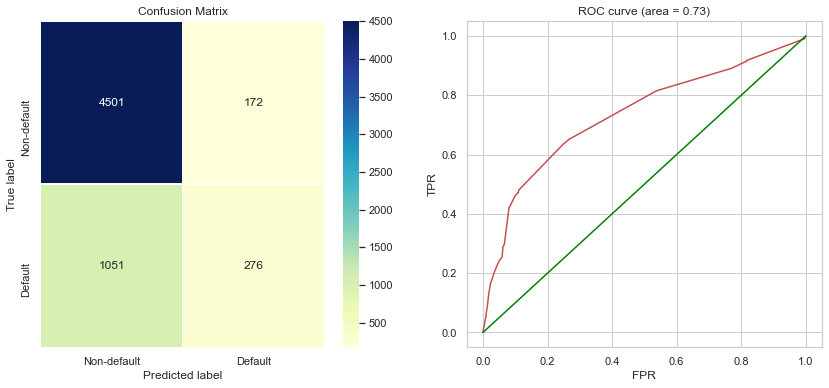

____________________________________________________________
Data is  Over Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 4}
Overall Train Accuracy 0.749375965767265
Train AUC Score 0.84272983457344
Overall Test Accuracy 0.6966666666666667
Test AUC Score 0.5297345410171888
Classification Report of Test
               precision    recall  f1-score   support

           0       0.79      0.83      0.81      4673
           1       0.27      0.23      0.25      1327

    accuracy                           0.70      6000
   macro avg       0.53      0.53      0.53      6000
weighted avg       0.68      0.70      0.69      6000

K-Fold scores: 0.688 (+/- 0.00170)


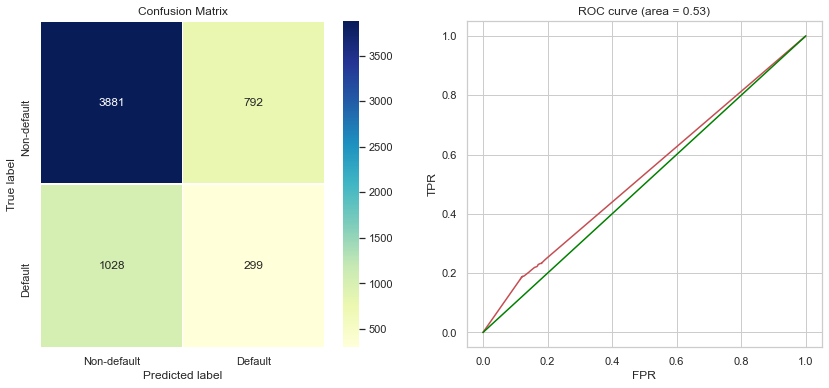

____________________________________________________________
Data is  Under Sampling  And with hyper parameter  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 14, 'min_samples_split': 32}
Overall Train Accuracy 0.557906807046805
Train AUC Score 0.5140616615830736
Overall Test Accuracy 0.7508333333333334
Test AUC Score 0.4941995503679929
Classification Report of Test
               precision    recall  f1-score   support

           0       0.77      0.96      0.86      4673
           1       0.11      0.02      0.03      1327

    accuracy                           0.75      6000
   macro avg       0.44      0.49      0.44      6000
weighted avg       0.63      0.75      0.67      6000

K-Fold scores: 0.501 (+/- 0.00001)


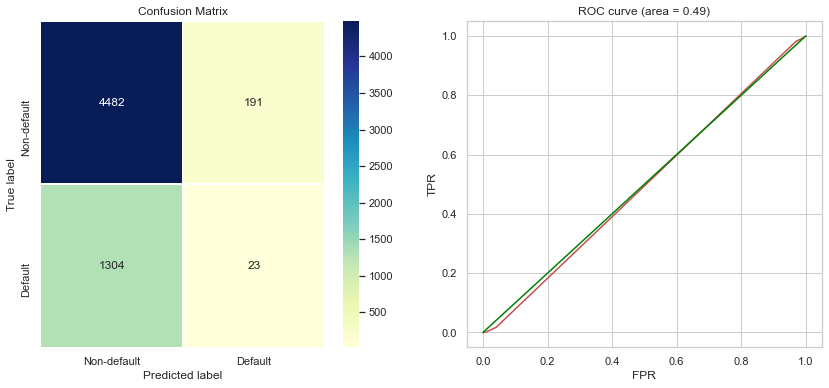

____________________________________________________________
Data is  SMOTE  And with hyper parameter  {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 17, 'min_samples_split': 4}
Overall Train Accuracy 0.8232839334439035
Train AUC Score 0.9138408542149319
Overall Test Accuracy 0.20466666666666666
Test AUC Score 0.35693930935478724
Classification Report of Test
               precision    recall  f1-score   support

           0       0.44      0.08      0.14      4673
           1       0.16      0.63      0.26      1327

    accuracy                           0.20      6000
   macro avg       0.30      0.36      0.20      6000
weighted avg       0.38      0.20      0.17      6000

K-Fold scores: 0.757 (+/- 0.00009)


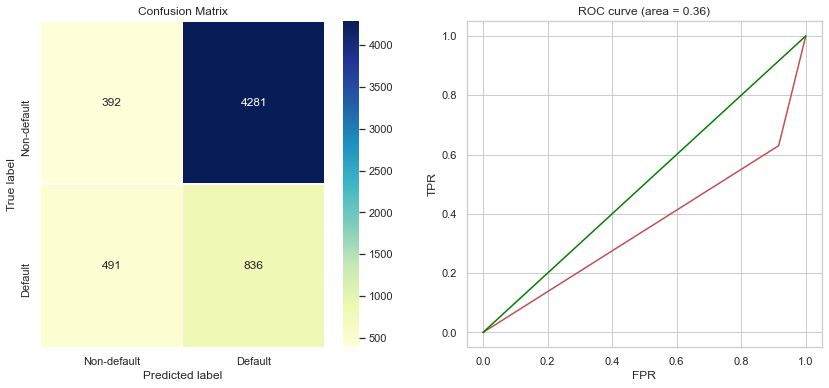

____________________________________________________________


In [109]:
xtrain_data = [X_train_1,df_upsampled.drop('def_pay',axis = 1),df_downsampled.drop('def_pay',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['def_pay'],df_downsampled['def_pay'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']
index = [0,1,2,3]

for i,j,k,l in zip(xtrain_data,ytrain_data,name,index):
    print('Data is ',k,' And with hyper parameter ',param_dt[l])
    model_eval(DecisionTreeClassifier(**param_dt[l],random_state= 42), i,j,X_test_1,y_test)
    print("_" * 60)

- Visualizing the Decesion tree using graphviz  .

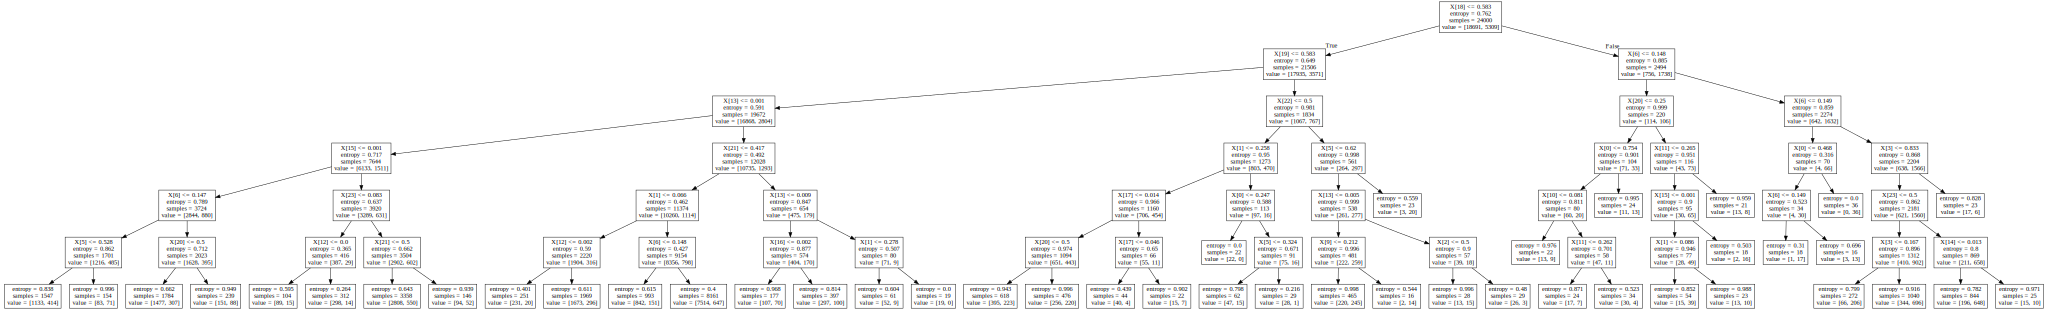

In [110]:
from sklearn import tree
import graphviz
param_r ={'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 16, 'min_samples_split': 28}
classif= DecisionTreeClassifier(**param_r,random_state = 10).fit(X_train1,y_train)
dot_data= tree.export_graphviz(classif, out_file=None)  
graph = graphviz.Source(dot_data)  
graph

- #### X[18] represents "Pay1_new" as the most important feature.


In [111]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,plot_roc_curve,accuracy_score
pd.set_option('display.max_columns',25)
warnings.filterwarnings('ignore')
def res(y_test_valid,y_train_valid):
    cm_log = confusion_matrix(y_test,y_test_valid)
    ConfusionMatrixDisplay(cm_log).plot()
    print(classification_report(y_test,y_test_valid))
    print('train_accuracy:',accuracy_score(y_train,y_train_valid))
    print('test_accuracy:',accuracy_score(y_test,y_test_valid))

#### Logistic Regression

#### Let's first find out the best parameters for logistic regression for all the datasets 

In [ ]:
xtrain_data = [X_train11,df_upsampled.drop('def_pay',axis = 1),df_downsampled.drop('def_pay',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['def_pay'],df_downsampled['def_pay'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']

for i,j,k in zip(xtrain_data,ytrain_data,name):
    global best_log
    print('Data is ',k)
    best_log = []
    # Setup the hyperparameter grid, (not scaled data)
    param_grid = {'C': np.logspace(-5, 8, 15)}
    # Instantiate a logistic regression classifier
    logreg = LogisticRegression(max_iter=500)
    # Instantiate the RandomizedSearchCV object
    logreg_cv = RandomizedSearchCV(logreg, param_grid ,scoring = 'roc_auc', cv=5, random_state=10)
    # Fit it to the data
    logreg_cv.fit(i,j)
    best_log.append(logreg_cv.best_params_)
    # Print the tuned parameters and score
    print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
    print("_" * 100)





In [112]:
param_log =[{'C': 163789.3706954068},{'C': 0.4393970560760795},{'C': 19306.977288832535},{'C': 1389495.494373136}]

Data is  Normal Sampling  And with hyper parameter  {'C': 163789.3706954068}
Overall Train Accuracy 0.8119166666666666
Train AUC Score 0.7278464199103906
Overall Test Accuracy 0.8091666666666667
Test AUC Score 0.708090747549899
Classification Report of Test
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      4673
           1       0.61      0.39      0.48      1327

    accuracy                           0.81      6000
   macro avg       0.72      0.66      0.68      6000
weighted avg       0.79      0.81      0.79      6000

K-Fold scores: 0.614 (+/- 0.00004)


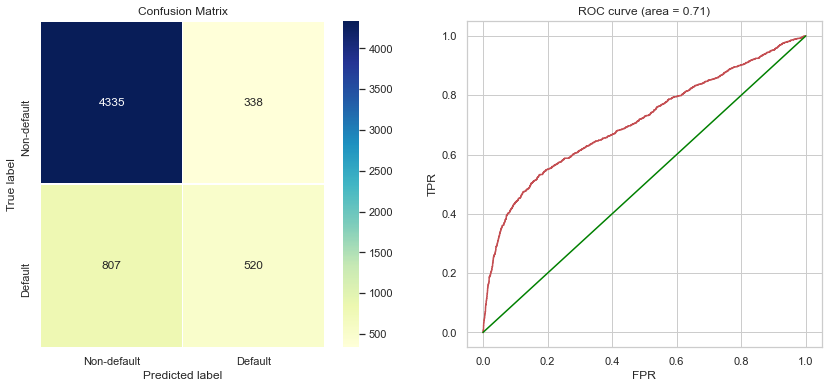

____________________________________________________________
Data is  Over Sampling  And with hyper parameter  {'C': 0.4393970560760795}
Overall Train Accuracy 0.5555390467134197
Train AUC Score 0.5224890942262662
Overall Test Accuracy 0.24083333333333334
Test AUC Score 0.463495096250309
Classification Report of Test
               precision    recall  f1-score   support

           0       0.73      0.04      0.08      4673
           1       0.22      0.95      0.36      1327

    accuracy                           0.24      6000
   macro avg       0.48      0.49      0.22      6000
weighted avg       0.62      0.24      0.14      6000

K-Fold scores: 0.500 (+/- 0.00000)


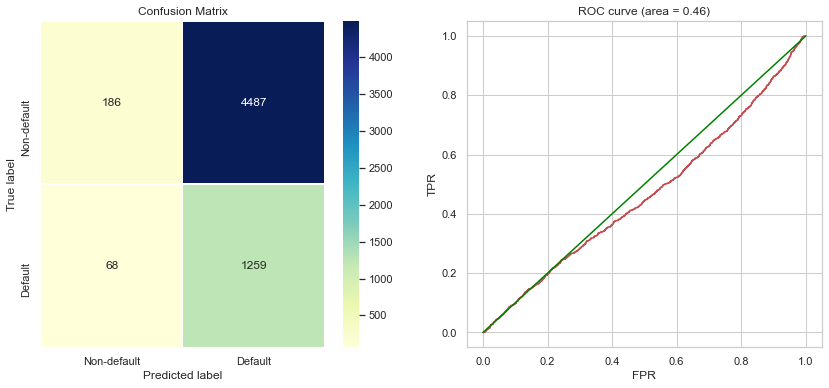

____________________________________________________________
Data is  Under Sampling  And with hyper parameter  {'C': 19306.977288832535}
Overall Train Accuracy 0.5559261961847181
Train AUC Score 0.5242693862878234
Overall Test Accuracy 0.7736666666666666
Test AUC Score 0.4699563994671243
Classification Report of Test
               precision    recall  f1-score   support

           0       0.78      0.99      0.87      4673
           1       0.06      0.00      0.00      1327

    accuracy                           0.77      6000
   macro avg       0.42      0.50      0.44      6000
weighted avg       0.62      0.77      0.68      6000

K-Fold scores: 0.501 (+/- 0.00001)


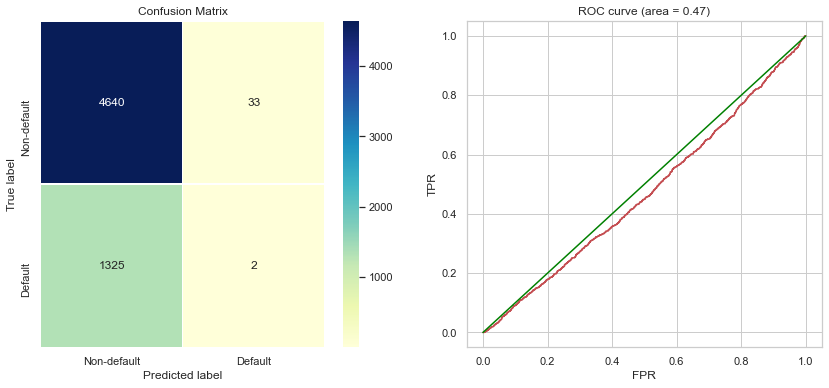

____________________________________________________________
Data is  SMOTE  And with hyper parameter  {'C': 1389495.494373136}
Overall Train Accuracy 0.6281097854582419
Train AUC Score 0.6715578483100902
Overall Test Accuracy 0.22116666666666668
Test AUC Score 0.6139291099876134
Classification Report of Test
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      4673
           1       0.22      1.00      0.36      1327

    accuracy                           0.22      6000
   macro avg       0.11      0.50      0.18      6000
weighted avg       0.05      0.22      0.08      6000

K-Fold scores: 0.627 (+/- 0.00006)


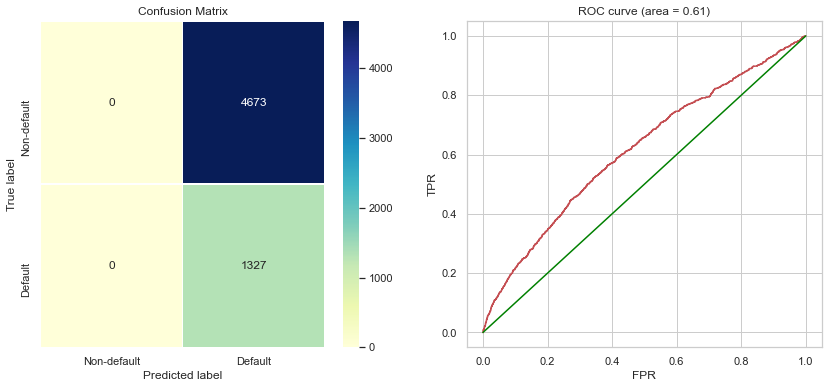

____________________________________________________________


In [113]:
xtrain_data = [X_train11,df_upsampled.drop('def_pay',axis = 1),df_downsampled.drop('def_pay',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['def_pay'],df_downsampled['def_pay'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']
index = [0,1,2,3]

for i,j,k,l in zip(xtrain_data,ytrain_data,name,index):
    print('Data is ',k,' And with hyper parameter ',param_log[l])
    model_eval(LogisticRegression(**param_log[l],random_state= 42,max_iter=1000), i,j,X_test11,y_test)
    print("_" * 60)

#### The best AUC score for Logistic Regression is seen in Normal sampling data with an Test AUC score of 0.71 and  accuracy score of 0.81

### Methodes Ensemblistes 

#### CATBOOST

In [133]:
categorical_ft_base = ['SEX', 'EDUCATION', 'MARRIAGE']

cat_model = CatBoostClassifier (random_state = 42, eval_metric = 'AUC',cat_features=categorical_ft_base)
cat_model.fit(X_train, y_train, early_stopping_rounds = 100, eval_set = [(X_test,y_test)], cat_features = categorical_ft_base)
pred_cat = cat_model.predict(X_test)

Learning rate set to 0.069474
0:	test: 0.7368527	best: 0.7368527 (0)	total: 192ms	remaining: 3m 12s
1:	test: 0.7542701	best: 0.7542701 (1)	total: 243ms	remaining: 2m 1s
2:	test: 0.7565981	best: 0.7565981 (2)	total: 282ms	remaining: 1m 33s
3:	test: 0.7612799	best: 0.7612799 (3)	total: 325ms	remaining: 1m 20s
4:	test: 0.7621757	best: 0.7621757 (4)	total: 365ms	remaining: 1m 12s
5:	test: 0.7620217	best: 0.7621757 (4)	total: 387ms	remaining: 1m 4s
6:	test: 0.7631347	best: 0.7631347 (6)	total: 432ms	remaining: 1m 1s
7:	test: 0.7636327	best: 0.7636327 (7)	total: 473ms	remaining: 58.7s
8:	test: 0.7644300	best: 0.7644300 (8)	total: 515ms	remaining: 56.7s
9:	test: 0.7656458	best: 0.7656458 (9)	total: 555ms	remaining: 54.9s
10:	test: 0.7663518	best: 0.7663518 (10)	total: 596ms	remaining: 53.6s
11:	test: 0.7665036	best: 0.7665036 (11)	total: 641ms	remaining: 52.8s
12:	test: 0.7668117	best: 0.7668117 (12)	total: 686ms	remaining: 52.1s
13:	test: 0.7661162	best: 0.7668117 (12)	total: 725ms	remaining

119:	test: 0.7801236	best: 0.7803542 (107)	total: 6.23s	remaining: 45.7s
120:	test: 0.7801096	best: 0.7803542 (107)	total: 6.3s	remaining: 45.8s
121:	test: 0.7799922	best: 0.7803542 (107)	total: 6.36s	remaining: 45.8s
122:	test: 0.7799316	best: 0.7803542 (107)	total: 6.41s	remaining: 45.7s
123:	test: 0.7800236	best: 0.7803542 (107)	total: 6.46s	remaining: 45.7s
124:	test: 0.7798543	best: 0.7803542 (107)	total: 6.53s	remaining: 45.7s
125:	test: 0.7799459	best: 0.7803542 (107)	total: 6.58s	remaining: 45.6s
126:	test: 0.7800045	best: 0.7803542 (107)	total: 6.62s	remaining: 45.5s
127:	test: 0.7799658	best: 0.7803542 (107)	total: 6.68s	remaining: 45.5s
128:	test: 0.7800164	best: 0.7803542 (107)	total: 6.74s	remaining: 45.5s
129:	test: 0.7801562	best: 0.7803542 (107)	total: 6.8s	remaining: 45.5s
130:	test: 0.7800907	best: 0.7803542 (107)	total: 6.86s	remaining: 45.5s
131:	test: 0.7802105	best: 0.7803542 (107)	total: 6.92s	remaining: 45.5s
132:	test: 0.7803412	best: 0.7803542 (107)	total: 6.9

232:	test: 0.7806247	best: 0.7810341 (202)	total: 12.2s	remaining: 40.3s
233:	test: 0.7805789	best: 0.7810341 (202)	total: 12.3s	remaining: 40.2s
234:	test: 0.7805336	best: 0.7810341 (202)	total: 12.3s	remaining: 40.2s
235:	test: 0.7803513	best: 0.7810341 (202)	total: 12.4s	remaining: 40.1s
236:	test: 0.7803097	best: 0.7810341 (202)	total: 12.4s	remaining: 40s
237:	test: 0.7801999	best: 0.7810341 (202)	total: 12.5s	remaining: 39.9s
238:	test: 0.7801857	best: 0.7810341 (202)	total: 12.5s	remaining: 39.8s
239:	test: 0.7802115	best: 0.7810341 (202)	total: 12.5s	remaining: 39.7s
240:	test: 0.7802167	best: 0.7810341 (202)	total: 12.6s	remaining: 39.7s
241:	test: 0.7803317	best: 0.7810341 (202)	total: 12.7s	remaining: 39.7s
242:	test: 0.7803754	best: 0.7810341 (202)	total: 12.7s	remaining: 39.6s
243:	test: 0.7803242	best: 0.7810341 (202)	total: 12.8s	remaining: 39.6s
244:	test: 0.7803265	best: 0.7810341 (202)	total: 12.8s	remaining: 39.5s
245:	test: 0.7804131	best: 0.7810341 (202)	total: 12.

In [134]:
print("Test Accuracy: ",metrics.accuracy_score(y_test, pred_cat))

Test Accuracy:  0.818


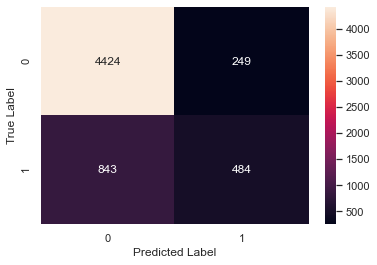

In [135]:

cat_confusion_matrix = metrics.confusion_matrix(y_test, pred_cat)
sns.heatmap(cat_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [136]:
print(metrics.classification_report(y_test, pred_cat, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.36      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



ROC_AUC:  0.7810341149133755


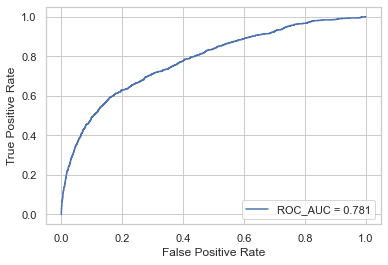

In [137]:
cat_pred_proba = cat_model.predict_proba(X_test)[:,1]

cat_roc_auc = metrics.roc_auc_score(y_test, cat_pred_proba)
print('ROC_AUC: ', cat_roc_auc)

cat_fpr, cat_tpr, thresholds = metrics.roc_curve(y_test, cat_pred_proba)

plt.plot(cat_fpr,cat_tpr, label = 'ROC_AUC = %0.3f' % cat_roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

### Catboost with Added Features

In [138]:
X_new = X.copy().drop(pay_x_new, axis = 1)
X_new = X_new.drop(bill_amtx_bins, axis = 1)
X_new = X_new.drop(['AgeBin', 'LimitBin'], axis = 1)

X_new.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,...,PAY_1_new,PAY_2_new,PAY_3_new,PAY_4_new,PAY_5_new,PAY_6_new,PAY_AMT1_bin,PAY_AMT2_bin,PAY_AMT3_bin,PAY_AMT4_bin,PAY_AMT5_bin,PAY_AMT6_bin
0,1,20000,2,2,1,24,3913,3102,689,0,0,0,...,2,2,-1,-1,-2,-2,"(-1, 0]","(0, 25000]","(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]"
1,2,120000,2,2,2,26,2682,1725,2682,3272,3455,3261,...,-1,2,0,0,0,2,"(-1, 0]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(0, 25000]"
2,3,90000,2,2,2,34,29239,14027,13559,14331,14948,15549,...,0,0,0,0,0,0,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
3,4,50000,2,2,1,37,46990,48233,49291,28314,28959,29547,...,0,0,0,0,0,0,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
4,5,50000,1,2,1,57,8617,5670,35835,20940,19146,19131,...,-1,0,-1,0,0,0,"(0, 25000]","(25000, 50000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"


In [139]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   ID            30000 non-null  int64   
 1   LIMIT_BAL     30000 non-null  int64   
 2   SEX           30000 non-null  int64   
 3   EDUCATION     30000 non-null  int64   
 4   MARRIAGE      30000 non-null  int64   
 5   AGE           30000 non-null  int64   
 6   BILL_AMT1     30000 non-null  int64   
 7   BILL_AMT2     30000 non-null  int64   
 8   BILL_AMT3     30000 non-null  int64   
 9   BILL_AMT4     30000 non-null  int64   
 10  BILL_AMT5     30000 non-null  int64   
 11  BILL_AMT6     30000 non-null  int64   
 12  PAY_AMT1      30000 non-null  int64   
 13  PAY_AMT2      30000 non-null  int64   
 14  PAY_AMT3      30000 non-null  int64   
 15  PAY_AMT4      30000 non-null  int64   
 16  PAY_AMT5      30000 non-null  int64   
 17  PAY_AMT6      30000 non-null  int64   
 18  PAY_1_

In [170]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in pay_amtx_bins:
    X_new[col] = le.fit_transform(X_new[col])
    


In [154]:
X_new_train, X_new_test, Y_train, Y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)

TypeError: Singleton array -1.408686344822737 cannot be considered a valid collection.

In [ ]:
categorical_ft_new = ['SEX', 'EDUCATION', 'MARRIAGE'
                      , 'PAY_AMT1_bin', 'PAY_AMT2_bin', 'PAY_AMT3_bin', 'PAY_AMT4_bin', 'PAY_AMT5_bin', 'PAY_AMT6_bin']

print(categorical_ft_new)

cat_model_new = CatBoostClassifier (random_state = 42, eval_metric = 'AUC',cat_features=categorical_ft_new)
cat_model_new.fit(X_new_train, Y_train, early_stopping_rounds = 100, eval_set = [(X_new_test,Y_test)], cat_features = categorical_ft_new)
pred_cat_new = cat_model_new.predict(X_new_test)

In [ ]:
print("Test Accuracy: ",metrics.accuracy_score(y_test, pred_cat_new))

In [ ]:
cat_new_confusion_matrix = metrics.confusion_matrix(y_test, pred_cat_new)
sns.heatmap(cat_new_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [ ]:
print(metrics.classification_report(y_test, pred_cat_new, labels = [0, 1]))

In [ ]:
cat_new_pred_proba = cat_model_new.predict_proba(X_new_test)[:,1]

cat_new_roc_auc = metrics.roc_auc_score(Y_test, cat_new_pred_proba)
print('ROC_AUC: ', cat_new_roc_auc)

cat_new_fpr, cat_new_tpr, thresholds = metrics.roc_curve(Y_test, cat_new_pred_proba)

plt.plot(cat_new_fpr,cat_new_tpr, label = 'ROC_AUC = %0.3f' % cat_new_roc_auc)
plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

In [ ]:
from catboost import Pool

pool = Pool(X_new_train, y_train, cat_features=categorical_ft_new)

Feature_importance = pd.DataFrame({'feature_importance': cat_model_new.get_feature_importance(pool), 
                      'feature_names': X_new_train.columns}).sort_values(by=['feature_importance'], 
                                                           ascending=False)

Feature_importance

In [ ]:
plt.figure(figsize=(10,10))

sns.barplot(x=Feature_importance['feature_importance'], y=Feature_importance['feature_names'], palette = 'rocket')

plt.show()

### XGBoost Classifier

In [155]:
import xgboost as xgb
from xgboost import XGBClassifier

In [156]:
xgb1 = XGBClassifier()
xgb1.fit(X_train, y_train)

[09:27:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [158]:
y_pred =xgb1.predict(X_test)


In [159]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [160]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['XGBOOST Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,XGBOOST Classifier,0.81,0.624501,0.353429,0.451396,0.646541


### AdaBoost

In [161]:
from sklearn.ensemble import AdaBoostClassifier
#Fit, predict
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_adab = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_adab))

Accuracy: 0.816


- Confusion Matrix

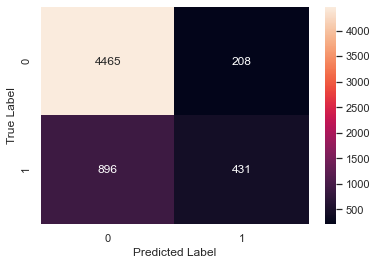

In [162]:
ada_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_adab)
sns.heatmap(ada_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()


### Feature Engineering ( Trying models without outliers)

In [171]:
df = df.copy().drop(pay_x_new, axis = 1)
df = df.drop(bill_amtx_bins, axis = 1)
#df = df.drop(pay_amtx_bins, axis = 1)
df = df.drop(['AgeBin', 'LimitBin'], axis = 1)
df.head()

KeyError: "['PAY_1' 'PAY_2' 'PAY_3' 'PAY_4' 'PAY_5' 'PAY_6'] not found in axis"

In [164]:
def delete_pays(df):
    list_results=list()
    for i,row in df.iterrows():
        items=row[6:12].tolist()
        a_set=set(items)
        number_of_unique_values=len(a_set)
        if(number_of_unique_values>2):
            list_results.append(i)
    for l in list_results:
        df.drop(l,inplace=True)
    return df
delete_pays(df)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,...,PAY_1_new,PAY_2_new,PAY_3_new,PAY_4_new,PAY_5_new,PAY_6_new,PAY_AMT1_bin,PAY_AMT2_bin,PAY_AMT3_bin,PAY_AMT4_bin,PAY_AMT5_bin,PAY_AMT6_bin
18,19,360000,2,1,1,49,0,0,0,0,0,0,...,1,-2,-2,-2,-2,-2,"(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]"
19,20,180000,2,1,2,29,0,0,0,0,0,0,...,1,-2,-2,-2,-2,-2,"(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]"
38,39,50000,1,1,2,25,0,780,0,0,0,0,...,1,-1,-1,-2,-2,-2,"(0, 25000]","(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]"
45,46,210000,1,1,2,29,0,0,0,0,0,0,...,-2,-2,-2,-2,-2,-2,"(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]"
77,78,300000,2,1,1,45,291,291,291,291,291,291,...,-1,-1,-1,-1,-1,-1,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29973,29974,230000,1,2,1,35,0,0,0,0,0,0,...,1,-2,-2,-2,-2,-2,"(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]"
29979,29980,180000,1,1,1,32,0,0,0,0,0,0,...,-2,-2,-2,-2,-2,-2,"(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]"
29985,29986,240000,1,1,2,30,0,0,0,0,0,0,...,-2,-2,-2,-2,-2,-2,"(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]"
29986,29987,360000,1,1,2,35,2220,0,0,0,0,0,...,-1,-1,-2,-2,-2,-2,"(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]"


In [166]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'def_pay', 'PAY_1_new', 'PAY_2_new', 'PAY_3_new', 'PAY_4_new',
       'PAY_5_new', 'PAY_6_new', 'PAY_AMT1_bin', 'PAY_AMT2_bin',
       'PAY_AMT3_bin', 'PAY_AMT4_bin', 'PAY_AMT5_bin', 'PAY_AMT6_bin'],
      dtype='object')

In [165]:
df.shape

(2249, 31)

In [167]:
payment_data=['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df[payment_data]
print(df["PAY_1"].value_counts())
print( len(df[(df["PAY_1"]>=1) & (df["def_pay"]==1)]) )   
print( len(df[(df["PAY_1"]>=1) & (df["def_pay"]==0)]) )

KeyError: "None of [Index(['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], dtype='object')] are in the [columns]"

In [ ]:
def investing_pay_1():
    for j in range(1,6):
        print("Payment_"+str(j))
        for i in range(-2,8,1):
            pay_contains = len(df[(df["PAY_"+str(j)]==i) & (df["def_pay"]==1)])
            print(str(i)+"_quantity: ", pay_contains)
            
investing_pay_1()
df["payment_1_eng"]=[1 if i<0 else 0 if i==0 else 2 for i in df["PAY_1"]]

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
for col in pay_amtx_bins:
    df[col] = le.fit_transform(df[col])

In [ ]:
df['somme_pay']=X_new['PAY_1']+X_new['PAY_2']+X_new['PAY_3']+X_new['PAY_4']+X_new['PAY_5']+X_new['PAY_6']

In [ ]:
y.groupby(df['somme_pay']).value_counts(normalize = True)


In [ ]:
plt.figure(figsize=(36,15))
ax = sns.countplot(data = df, x = 'somme_pay', hue="def_pay", palette = 'rocket',)

plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,11000)
ax.tick_params(axis="x", labelsize= 9.5)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

In [ ]:
df=df[df.somme_pay <14]

In [ ]:
df.shape

In [ ]:
plt.style.use("ggplot")
fig, axs = plt.subplots(2,3, figsize=(16,10))

axs[0,0].boxplot(df["AGE"])
axs[0,0].set_title("Age outliers", color="#14B0B3", size=20)
axs[0,0].set_ylabel("Age", color="#36EA15", size = 15)

axs[0,1].boxplot(df["LIMIT_BAL"])
axs[0,1].set_title("Limit Amount", color="#14B0B3", size=20)
axs[0,1].set_ylabel("credit_limit", color="#258912", size = 15)

axs[0,2].boxplot(df["PAY_1"])
axs[0,2].set_title("PAY 1", color="#14B0B3", size=20)
axs[0,2].set_ylabel("Pay_1 Amount", color="#16560A", size = 15)

axs[1,0].boxplot(df["PAY_AMT1"])
axs[1,0].set_title("PAY Amount 1", color="#14B0B3", size=20)
axs[1,0].set_ylabel("Pay_1 Amount", color="#36EA15", size = 15)

axs[1,1].boxplot(df["PAY_AMT2"])
axs[1,1].set_title("PAY Amount 2", color="#14B0B3", size=20)
axs[1,1].set_ylabel("Pay_1 Amount", color="#258912", size = 15)

axs[1,2].boxplot(df["BILL_AMT1"])
axs[1,2].set_title("Bill Amount 1", color="#14B0B3", size=20)
axs[1,2].set_ylabel("Pay_1 Amount", color="#16560A", size = 15)

In [ ]:
df.shape

In [ ]:
outlier_columns=["AGE","LIMIT_BAL", "PAY_1", "PAY_2","PAY_3","PAY_4","PAY_5","PAY_6", "PAY_AMT1", "PAY_AMT2","BILL_AMT1","BILL_AMT2"]
age_outlier = []
limitbal_outlier = []
pay1_outlier = []
pay2_outlier = []
pay3_outlier = []
pay4_outlier = []
pay5_outlier = []
pay6_outlier = []
payamt1_outlier = []
payamt2_outlier = []
billamt_outlier = []
billamt2_outlier = []

outliers_array=[age_outlier,limitbal_outlier,pay1_outlier,pay2_outlier,pay3_outlier, pay4_outlier, pay5_outlier, pay6_outlier,payamt1_outlier,payamt2_outlier,billamt_outlier,billamt2_outlier]

def outlier_detect(data):
    for i, column in enumerate(outlier_columns):
        Q1 = np.percentile(data[column], 25)
        Q3 = np.percentile(data[column], 75)
        IQR = Q3- Q1
        outlier_step = IQR*1.5

        outlier_values = data[(data[column]<Q1-outlier_step) | (data[column] >Q3+outlier_step)]
        print("*****", column, "******")
        #print(outlier_values)
        
        outlier_values_and_1 = data[((data[column]<Q1-outlier_step) | (data[column] >Q3+outlier_step)) & (data["def_pay"]==1)]
        print("1 ratio is: %",((len(outlier_values_and_1)/len(outlier_values))*100))
        
        outliers_array[i].append(outlier_values_and_1.index)

outlier_detect = outlier_detect(df)

In [ ]:
df["dangeroues_cust"]=0

for i in pay1_outlier:
    df["dangeroues_cust"].loc[i]=1

print(df["dangeroues_cust"].value_counts())

In [ ]:
df["total_payment"]=df["PAY_AMT1"]+df["PAY_AMT2"]+df["PAY_AMT3"]+df["PAY_AMT4"]+df["PAY_AMT5"]+df["PAY_AMT6"]

df["repay_cust"]=1
repay_cust = df[(df["total_payment"]>df["LIMIT_BAL"]) & (df["def_pay"]==0)].index
for i in repay_cust:
    df["repay_cust"].loc[i]=0

In [ ]:
df["pays_means"]=0
def mean_grades(data, column):
    for i in range(1,7):
        data[column] += data["PAY_"+str(i)]
    data[column]=data[column]/i

mean_grades(df, "pays_means")


pay_mean = df["pays_means"].mean()
pay_std = df["pays_means"].std()
pay_min = df["pays_means"].min()
pay_max = df["pays_means"].max()
print("for grades:\n pay mean:{:.2f}\n pay standart dev.:{:.2f}\n pay min: {}\n pay max: {}".format(pay_mean,pay_std,pay_min, pay_max))
df["pays_means"]=[0 if i<(pay_mean-pay_std) else 2 if i>(pay_mean+pay_std) else 1 for i in df["pays_means"] ]

In [ ]:
limit_mean = df["LIMIT_BAL"].mean()
limit_std = df["LIMIT_BAL"].std()
print("Credit limit mean: {:.2f} and standart deviation: {:.2f}".format(limit_mean, limit_std))

Q1= df["LIMIT_BAL"].quantile(.20) 
Q2= df["LIMIT_BAL"].quantile(.40) 
Q3= df["LIMIT_BAL"].quantile(.60) 
Q4= df["LIMIT_BAL"].quantile(.80) 
df["limit_class"] = [0 if i<Q1 else 1 if i>=Q1 and i<Q2 else 2 if i>=Q2 and i<Q3 else 4 if i>=Q3 and i<Q4 else 5 for i in df["LIMIT_BAL"]]

In [ ]:
df["dangeroues_cust2"]=0

for i in payamt2_outlier:
    df["dangeroues_cust2"].loc[i]=1

print(df["dangeroues_cust2"].value_counts())

In [ ]:
Q1= df["AGE"].quantile(.20) 
Q2= df["AGE"].quantile(.40) 
Q3= df["AGE"].quantile(.60) 
Q4= df["AGE"].quantile(.80) 
df["AGE_class"] = [0 if i<Q1 else 1 if i>=Q1 and i<Q2 else 2 if i>=Q2 and i<Q3 else 4 if i>=Q3 and i<Q4 else 5 for i in df["AGE"]]

In [ ]:
df.head()

In [ ]:
data2=pd.DataFrame(df.iloc[:,24:])
plt.figure(figsize=(18,10))
sns.heatmap(data2.corr(),annot=True,fmt='.2f',color='red',cmap='coolwarm')
plt.show()

In [ ]:
data2['MARRIAGE'] =df['MARRIAGE']
data2['PAY_1'] =df['PAY_1']

In [ ]:
data2.head()

In [ ]:
X_2=data2.drop(columns=['def_pay'],axis=1)
y_2=data2['def_pay']
#X_2=data2.drop(axis=1)

#scaled = (x - xmin) / (xmax - xmin)  for logistic regression
X_2["total_payment"] = (X_2["total_payment"]- X_2["total_payment"].min()) /  (X_2["total_payment"].max()- X_2["total_payment"].min()) 
X_train_2,X_test_2,y_train_2,y_test_2=train_test_split(X_2,y_2,test_size=0.35,random_state=0)

In [ ]:
import xgboost as xgb
reg_xgb.fit(X_train_2, y_train_2)
y_pred_xgb =reg_xgb.predict(X_test_2)
score_xgb_2=accuracy_score(y_pred_xgb,y_test_2)*100
print("Xgboost SCORE:{:.3f}".format(score_xgb_2))

rf_model.fit(X_train_2, y_train_2)
y_pred_rfc = rf_model.predict(X_test_2)
score_rfc_2=accuracy_score(y_pred_rfc,y_test_2)*100
print("RandomForestClassifier SCORE:{:.3f}".format(score_rfc_2))

log_reg = LogisticRegression(n_jobs=-1,solver='liblinear')
log_reg.fit(X_train_2, y_train_2)
y_pred_log_2 = log_reg.predict(X_test_2)
score_log_2=accuracy_score(y_pred_log_2,y_test_2)*100
print("Logistic Regression SCORE:{:.3f}".format(score_log_2))

In [ ]:
cat_model_new = CatBoostClassifier (random_state = 42, eval_metric = 'AUC')
cat_model_new.fit(X_train_2, y_train_2, early_stopping_rounds = 100, eval_set = [(X_test_2,y_test_2)])
pred_cat_new = cat_model_new.predict(X_test_2)

In [ ]:
print("Test Accuracy: ",metrics.accuracy_score(y_test_2, pred_cat_new))

In [ ]:
cat_new_confusion_matrix = metrics.confusion_matrix(y_test_2, pred_cat_new)
sns.heatmap(cat_new_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [ ]:
cat_pred_proba = cat_model_new.predict_proba(X_test_2)[:,1]

cat_roc_auc = metrics.roc_auc_score(y_test_2, pred_cat_new)
print('ROC_AUC: ', cat_roc_auc)


cat_fpr, cat_tpr, thresholds = metrics.roc_curve(y_test_2, pred_cat_new)

plt.plot(cat_fpr,cat_tpr, label = 'ROC_AUC = %0.3f' % cat_roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

## Discriminant analysis


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

First , we are going to normalize our Data.


In [ ]:
from sklearn import preprocessing
modelLDA = LinearDiscriminantAnalysis()
X_normalized_train=preprocessing.normalize(X_train1)
X_normalized_test = preprocessing.normalize(X_test1)

Then we're going to train the model and make our prediction based on the test part of our dataset.

In [ ]:
modelLDA.fit(X_normalized_train, y_train)
Y_predicted = modelLDA.predict(X_normalized_test)
Y_predicted

##### Model accuracy

Let's start by computing the empirical accuracy value (% of right prediction)

In [ ]:
empirical_accuracy = metrics.accuracy_score(y_test, Y_predicted)*100
print(f"model empirical accuracy is {str(empirical_accuracy)[:5]}% (error rate = {str(100-empirical_accuracy)[:5]}%)")

But, according to the study of Cheng Yeh & Che-hui Lien, the empirical accuracy (error rate) isn't a suitable metric to be used in our case to evaluate the model. 
Thus, we are going to use the area ratio, instead of the error rate, to examine the classification accuracy of our model.
To do this we have to:
* Sort our individuals by their LDA scores 
* Build the ROC curve
* Compute the area ratios

In [ ]:
Y_scores = modelLDA.decision_function(X_normalized_test)

In [ ]:
real_def_pay = list(y_test)
Y_dist = modelLDA.decision_function(X_normalized_test)
for i,f in enumerate(Y_dist):
    print(f," => ",Y_predicted[i])

In [ ]:
Individuals_and_their_score = [(i,f,real_def_pay[i],Y_predicted[i]) for i,f in enumerate(Y_dist)]
sorted_individuals_by_score = sorted(Individuals_and_their_score,key=lambda x:x[1],reverse=True)

In [ ]:
individuals_with_def_pay = list(y_test).count(1)

Lets build the ROC curve

In [ ]:
# Theoretical curve

curve_x=list(range(0,len(X_normalized_test)+1))
th_curve_y= []
for i in range(0,individuals_with_def_pay+1):
    th_curve_y.append(i)
for i in range(individuals_with_def_pay+1,len(X_normalized_test)+1):
    th_curve_y.append(individuals_with_def_pay)

In [ ]:
# Baseline curve
base_curve_y = []
a = (individuals_with_def_pay)/(len(X_normalized_test)+1)
for i in range(0,len(X_normalized_test)+1):
    base_curve_y.append(a*i)

In [ ]:
# ROC curve

model_curve_y = [0]
for individual in sorted_individuals_by_score:
    model_curve_y.append(model_curve_y[-1]+int(individual[2] == 1))
plt.plot(curve_x,th_curve_y,curve_x,base_curve_y,curve_x,model_curve_y)

Computing the area ratio (area between ROC & baseline / area between theoretical & baseline)

In [ ]:
area_base_line = (0.5* len(X_normalized_test)*individuals_with_def_pay)
area_best_curve= (individuals_with_def_pay*(len(X_normalized_test)-individuals_with_def_pay)+(0.5*individuals_with_def_pay*individuals_with_def_pay))
area_btw_bestandbase=area_best_curve-area_base_line
area_model = 0
for x in range(1,len(X_test1)+1) :
     area_model += model_curve_y[x-1] 

area_model = area_model-area_base_line
area_ratio = area_model/area_btw_bestandbase
print(f"the area ratio is {area_ratio}")

We find that the area under the curve is equal to 0.39 wich is very similar to the research (0.40). 

#### Predictive accuracy of probability of default

We will order the test data based on the predicted probability

In [ ]:
Y_def_probability = modelLDA.predict_proba(X_normalized_test)

In [ ]:
Individuals_and_their_probability = [(i,f[1],real_def_pay[i]) for i,f in enumerate(Y_def_probability)]
Sorted_individuals_and_their_probability = sorted(Individuals_and_their_probability,key=lambda x:x[1])

Here we are going to use the SSM method to try and predict the actual probability of default , for that we are going to smooth the curve using sliding window of width 101

In [ ]:
population_size = len(Sorted_individuals_and_their_probability)

F = [int(d[2]==1) for d in Sorted_individuals_and_their_probability]
Predicted_probability = [d[1] for d in Sorted_individuals_and_their_probability]
Actual_probability = []

window_width = 50

for i in range(0,population_size):
    p = F[i]
    nb_points=2*window_width+1
    for j in range(1,50):
        if i-j < 0:
            nb_points-=1
            continue
        p += F[i-j]
    for j in range(1,50):
        if i+j >= population_size:
            nb_points-=1
            continue
        p += F[i+j]
    Actual_probability.append(p/nb_points)
    
x_axis = list(range(population_size))
plt.plot(x_axis,Actual_probability)

Now, using the estimated actual probability, we will try to find out if or model's predicted probability represents the actual probability of default or not. To do so, we need to: 
* Extract the regression coefficient and intercept correspandant to the scatter (Predicted_probability, Actual_probability)
* Extract the coefficient of determination R²  
* Compare the regression line to the identity line (f(x) = x) and the coeff of determination to 1

In [ ]:
# Lets plot the scatter F(Actual_Prob, Predicted_Prob)
plt.scatter(Predicted_probability,Actual_probability)

In [ ]:
a,b = np.polyfit(Predicted_probability,Actual_probability,1)
print(f"The regression line's equation is y = {str(a)[:5]}*x{str(b)[:6]}")

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(Predicted_probability,Actual_probability)
print(f"The coeff of determination R² is {r2}")

In [ ]:
plt.scatter(Predicted_probability,Actual_probability)
plt.plot(Predicted_probability,[a*f+b for f in Predicted_probability],"r")

### Conclusion (LDA)


After trying to predict the value of default payement using the Linear Discriminant Algorithm and comparing our testing values with the actual real values we conclude that: 
* This technique has a 26% error rate (empirical accuracy)
* According to the area ration accuracy model, the lda area ratio is 0.39
* After estimating the real default probability, we found out that the predicted default probability cannot reprensent the real value since the coeff of determinisation R² is 0.18 (far from 1) and the regression coefficient is 0.63 (far from 1) 